In [1]:
import numpy as np
import pylab as py
import scipy.signal as ss
import scipy.fftpack as sf

def czas(T = 1.0, Fs = 128.0):
    dt = 1.0/Fs
    t = np.arange(0,T,dt)
    return t
 
def gauss(t0 = 0.3, sigma = 0.02, T = 1.0, Fs = 128.0):
    t = czas(T,Fs)
    s = np.exp(-((t-t0)/(sigma))**2/2)
    return s
 
def g2(t0 = 0.3, sigma = 0.02, T = 1.0, Fs = 128.0):
    t = czas(T,Fs)
    s = (-(t-t0)/(sigma))*np.exp(-((t-t0)/(sigma))**2/2)
    return s
 
def g3(t0 = 0.3, sigma = 0.02, T = 1.0, Fs = 128.0):
    t = czas(T,Fs)
    s = np.exp(-((t-t0)/(sigma))**2/2)
    s[t<t0] = 0
    return s
 
def gabor(t0 = 0.5, sigma = 0.1, T = 1.0, f=10, phi = 0, Fs = 128.0):
    t = czas(T,Fs)
    s = np.exp(-((t-t0)/(sigma))**2/2) * np.cos(2*np.pi*f*(t-t0) + phi)
    return s
 
def sin(f = 10.0, T = 1.0, Fs = 128.0, phi =0 ):
    '''sin o zadanej cz?sto?ci (w Hz), d?ugo?ci, fazie i cz?sto?ci próbkowania
    Domy?lnie wytwarzany jest sygna? reprezentuj?cy 
    1 sekund? sinusa o cz?sto?ci 1Hz i zerowej fazie próbkowanego 128 Hz
    '''
    t = czas(T,Fs)
    s = np.sin(2*np.pi*f*t + phi)
    return s
 
def chirp(f0,fk,T,Fs):
    t = czas(T,Fs)
    f  = f0 + (fk-f0)/2.0/(T)*t
    s  = np.cos(2*np.pi*t*f)
    return s
 
def cwt(x, MinF,MaxF,Fs,w=7.0,df=1.0,plot = True):
    '''w - parametr falki Morleta,
      wiaze sie z jej czestoscia centralna i skala w nastepujacy sposob:
      f = 2*s*w / T
      gdzie: s-skala,  T-dlugosc sygnalu w sek.'''
    T= len(x)/Fs
    M = len(x)
    t = np.arange(0,T,1./Fs)
    freqs = np.arange(MinF,MaxF,df)
    P = np.zeros((len(freqs),M))
    X = sf.fft(x)
    for i,f in enumerate(freqs):
        s = T*f/(2*w)
        psi = sf.fft(ss.morlet(M, w=w, s=s, complete=True))
        psi /= np.sqrt(np.sum(psi*psi.conj()))    
        tmp = np.fft.fftshift(sf.ifft(X*psi))
        P[i,:] = (tmp*tmp.conj()).real
 
    if plot:
        py.imshow(P,aspect='auto',origin='lower',extent=(0,T,MinF, MaxF))
        py.show()
    return P,f,t
 
def wvd(x, Fs, plot=True):
    samples = len(x)
    N = samples / 2
    z = np.zeros(samples)
    xh = ss.hilbert(x)
    x_period_h = np.concatenate((z,xh,z));
 
    t = range(0, samples, 1)  # czas w samplach
    tfr = np.zeros((samples , samples), dtype=complex)
    for ti in t:
        for tau in range(-samples//2,samples//2):
            tfr[samples//2 + tau, ti] =  x_period_h[samples+ti +  tau] * x_period_h[samples+ti - tau].conj() 
    tfr = np.fft.fftshift(tfr,axes = 0)
    Tfr = np.fft.fft(tfr, samples, axis=0)/samples
    ts = np.array(t, dtype=float) / (float(Fs))
    f = np.linspace(0, Fs / 2, N)
    if plot:
        py.imshow( Tfr.real, interpolation='nearest', extent=[0, ts[-1], 0, f[-1]], origin='lower', aspect='auto')
        py.show()
    return Tfr, ts, f

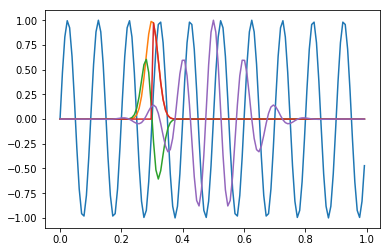

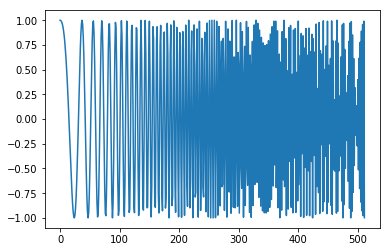

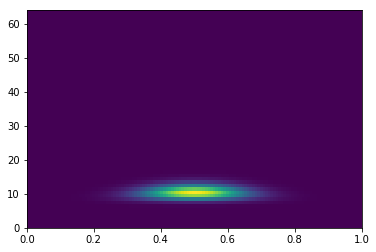

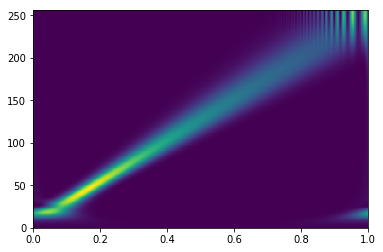

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


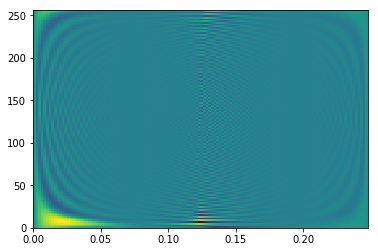

In [2]:
t = czas()
Fs = 512.0
T = 1.0
py.plot(t,sin(),t,gauss(),t,g2(),t,g3(),t,gabor())
py.show()
ch = chirp(5,Fs/2-5,T,Fs)
py.plot(ch)
py.show()
cwt(gabor(),0.1,64,128)
cwt(ch,0.1,Fs/2,Fs)
ch = gabor(t0=0,f=Fs/2)
cos = wvd(ch,Fs)

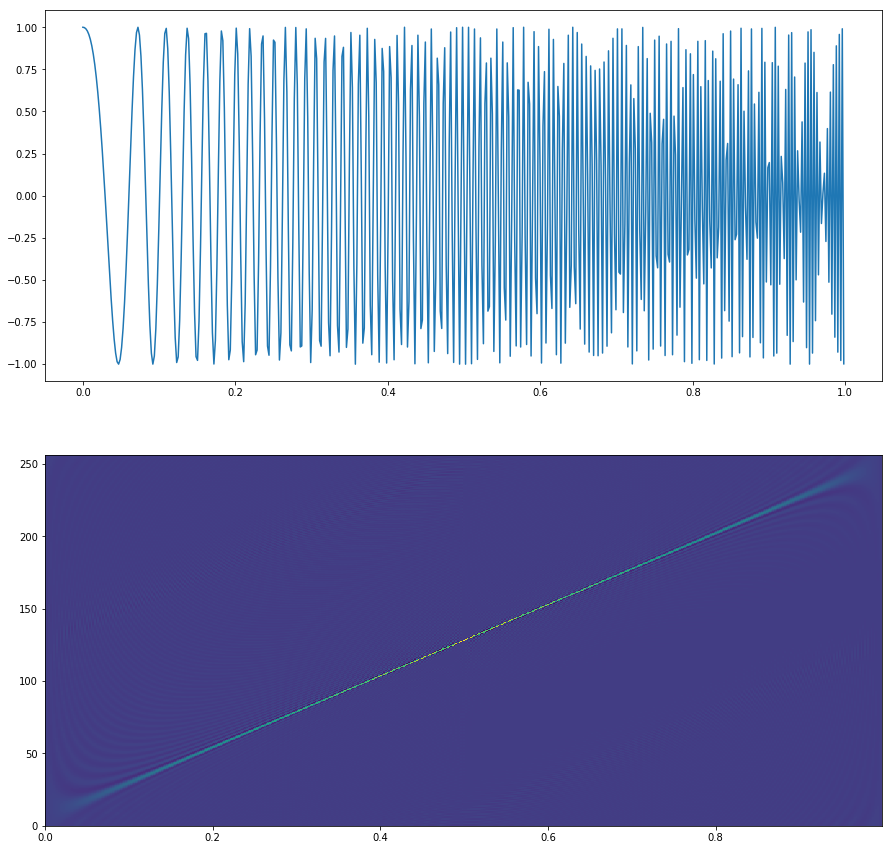

In [3]:
import tf as tf
import pylab as py
 
py.rcParams['figure.figsize'] = (15.0, 15.0)

Fs = 512.0
T = 1.0
t = tf.czas(T,Fs)
ch = tf.chirp(5,Fs/2-5,T,Fs)
Tfr,ts,f = tf.wvd(ch,Fs,False)
py.subplot(2,1,1)
py.plot(t,ch)
py.subplot(2,1,2)
py.imshow(Tfr.real,interpolation= 'nearest',extent=[0,ts[-1],0,f[-1]],origin='lower',aspect='auto')
py.show()

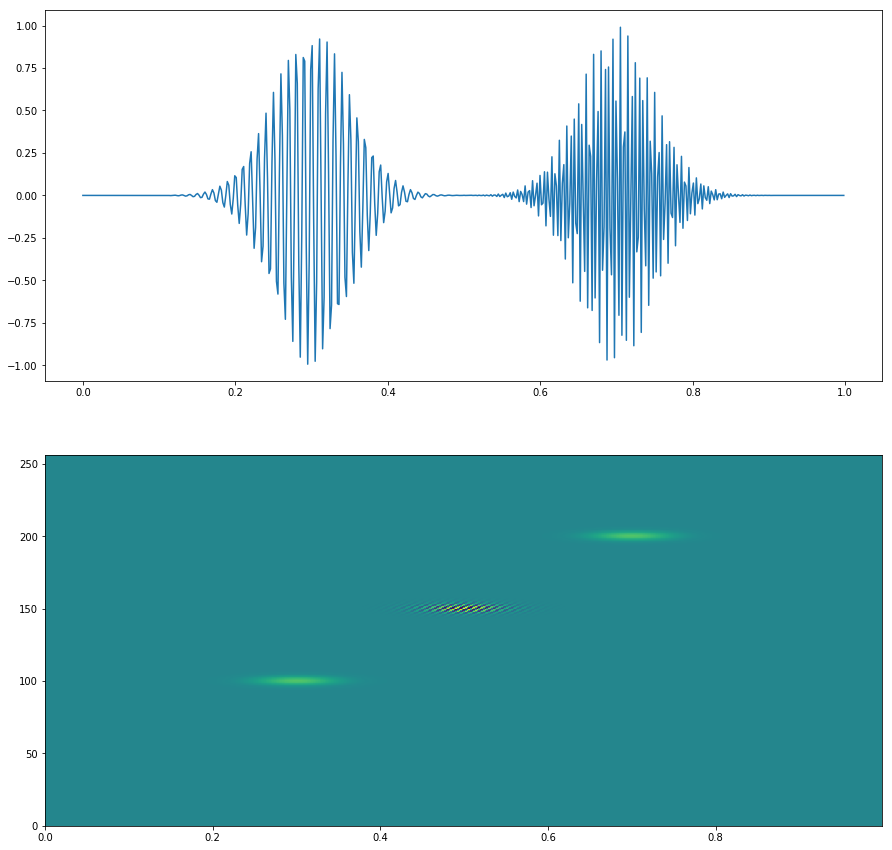

In [4]:
Fs = 512.0
T = 1.0
t = tf.czas(T,Fs)
s1 = tf.gabor(t0=0.3, sigma = 0.05, T = 1.0, f=100, phi = 0,Fs=Fs)
s2 = tf.gabor(t0=0.7, sigma = 0.05, T = 1.0, f=200, phi = 0,Fs=Fs)
s = s1 + s2
Tfr,ts,f = tf.wvd(s,Fs,False)
py.subplot(2,1,1)
py.plot(t,s)
py.subplot(2,1,2)
py.imshow(Tfr.real,interpolation= 'nearest',extent=[0,ts[-1],0,f[-1]],origin='lower',aspect='auto')
py.show()

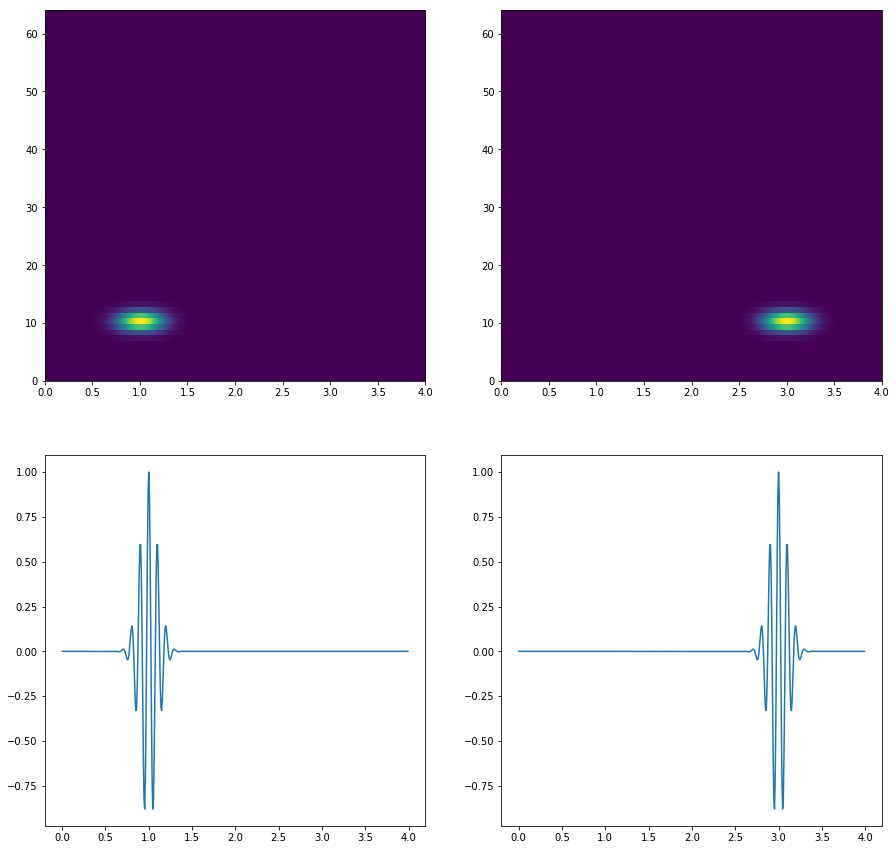

In [5]:
# parametry
t0    = 1.0
sigma = 0.1
T     = 4.0
f     = 10
phi   = 0
Fs    = 128.0
NFFT  = int(Fs)
 
sig1 = gabor(t0, sigma, T, f, phi, Fs) # sygnał
sig2 = gabor(t0 + 2, sigma, T, f, phi, Fs) # sygnał przesunięty w czasie
 
py.subplot(221)
h = ss.hamming(NFFT)
sig1_padded = (np.concatenate((np.zeros(NFFT//2),sig1,np.zeros(NFFT//2))))
P,f,t,im1 = py.specgram(sig1_padded,NFFT = len(h),Fs = Fs,window = h, noverlap = NFFT-1, sides = 'onesided') 
py.imshow(P,aspect='auto',origin='lower',extent=(t[0]-(NFFT/2)/Fs,t[-1]-(NFFT/2)/Fs,f[0],f[-1]),interpolation='nearest')
 
py.subplot(222)
sig2_padded = (np.concatenate((np.zeros(NFFT//2),sig2,np.zeros(NFFT//2))))
P,f,t,im2 = py.specgram(sig2_padded,NFFT = len(h),Fs = Fs,window = h, noverlap = NFFT-1, sides = 'onesided') 
py.imshow(P,aspect='auto',origin='lower',extent=(t[0]-(NFFT/2)/Fs,t[-1]-(NFFT/2)/Fs,f[0],f[-1]),interpolation='nearest')
 
 
py.subplot(223)
time    = czas(T, Fs)
py.plot(time,sig1)
 
py.subplot(224)
py.plot(time ,sig2)
 
py.show()

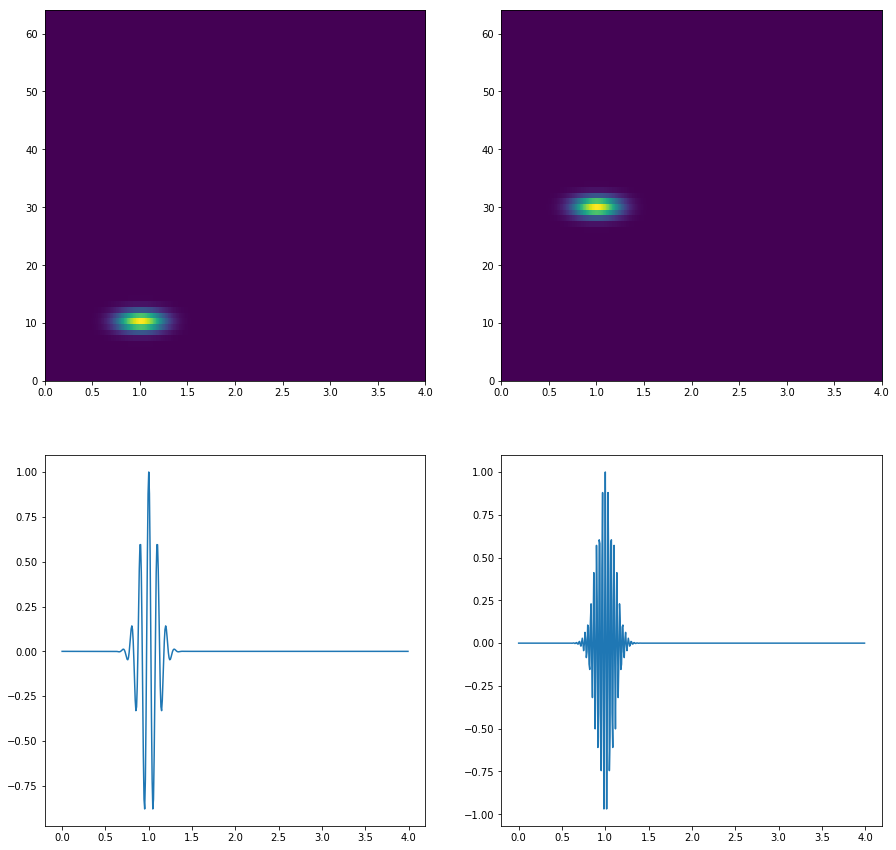

In [6]:
# parametry
t0    = 1.0
sigma = 0.1
T     = 4.0
f     = 10
phi   = 0
Fs    = 128.0
NFFT  = int(Fs)
time    = czas(T, Fs)
sig1 = gabor(t0, sigma, T, f, phi, Fs) # sygnał
sig2 = gabor(t0, sigma, T, f+20, phi, Fs)# sygnał przesunięty w częstości
 
py.subplot(221)
h = ss.hamming(NFFT)
sig1_padded = (np.concatenate((np.zeros(NFFT//2),sig1,np.zeros(NFFT//2))))
P,f,t,im1 = py.specgram(sig1_padded,NFFT = len(h),Fs = Fs,window = h, noverlap = NFFT-1, sides = 'onesided') 
py.imshow(P,aspect='auto',origin='lower',extent=(t[0]-(NFFT/2)/Fs,t[-1]-(NFFT/2)/Fs,f[0],f[-1]),interpolation='nearest')
 
py.subplot(222)
sig2_padded = (np.concatenate((np.zeros(NFFT//2),sig2,np.zeros(NFFT//2))))
P,f,t,im2 = py.specgram(sig2_padded,NFFT = len(h),Fs = Fs,window = h, noverlap = NFFT-1, sides = 'onesided') 
py.imshow(P,aspect='auto',origin='lower',extent=(t[0]-(NFFT/2)/Fs,t[-1]-(NFFT/2)/Fs,f[0],f[-1]),interpolation='nearest')
 
 
py.subplot(223)
py.plot(time,sig1)
 
py.subplot(224)
py.plot(time ,sig2)
 
py.show()

/home/praceeg_1/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7609: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


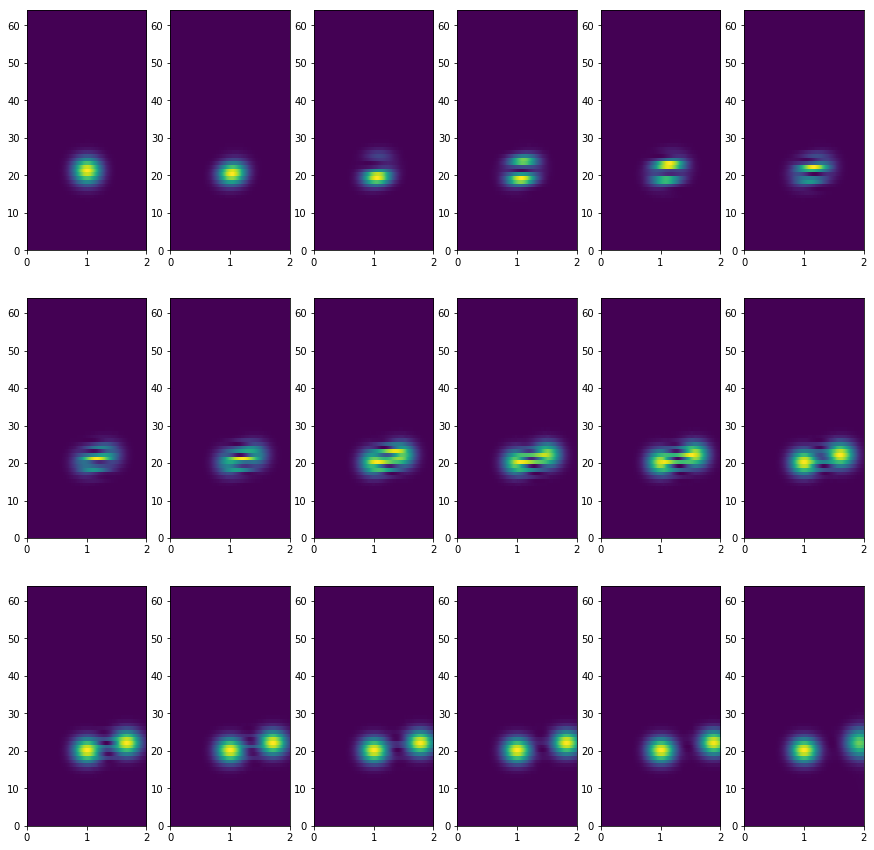

In [7]:
# parametry
t0    = 1.0
sigma = 0.05
T     = 2.0
f0     = 20
phi   = 0
Fs    = 128.0
NFFT  = int(Fs)
time  = czas(T, Fs)
h = ss.hamming(NFFT)
 
for i in range(18):
    py.subplot(3,6,i+1)
    sig1  = gabor(t0, sigma, T, f0, phi, Fs) # sygnal
    sig2  = gabor(t0+i*0.055, sigma, T, f0+2, phi, Fs)# sygnał przesunięty w częstości o 2 Hz i w czasie o i*0.1 s
    sig1_padded = (np.concatenate((np.zeros(NFFT//2),sig1,np.zeros(NFFT//2))))
    sig2_padded = (np.concatenate((np.zeros(NFFT//2),sig2,np.zeros(NFFT//2))))
    P,f,t,im1 = py.specgram(sig1_padded+sig2_padded,NFFT = len(h),Fs = Fs,window = h, noverlap = NFFT-1, sides = 'onesided') 
    py.imshow(P,aspect='auto',origin='lower',extent=(t[0]-(NFFT/2)/Fs,t[-1]-(NFFT/2)/Fs,f[0],f[-1]),interpolation='nearest')
 
py.show()

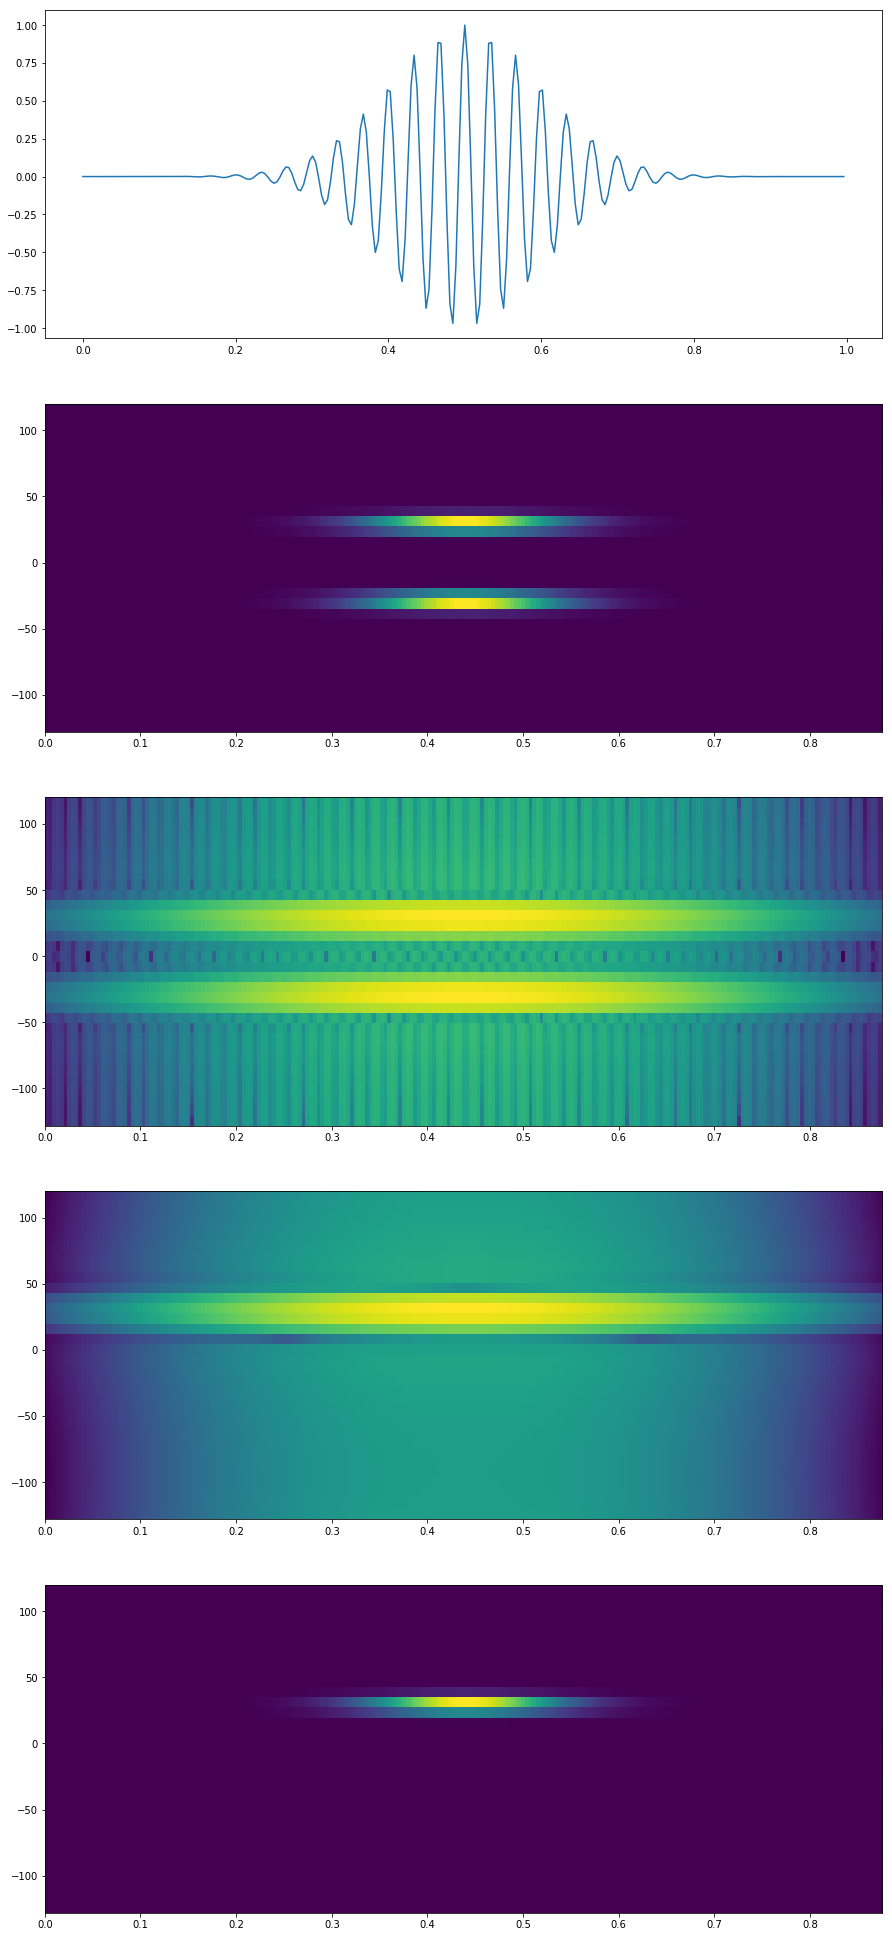

In [8]:
from matplotlib.pyplot import specgram, plot, subplot, show, imshow
from tf import czas, gabor
from numpy import pi, log
from scipy.signal import hamming, hilbert
 
# parametry
t0    = 0.5
sigma = 0.1
T     = 1.0
f     = 30
phi   = 0
Fs    = 256.0
 
s = gabor(t0, sigma, T, f, phi, Fs) 
t = czas(T, Fs)

py.figure(figsize=(15,35))

subplot(511)
plot(t,s)
 
subplot(512)
h = hamming(32)
NFFT =len(h)
P,f,t,im1 = specgram(s,NFFT = len(h),Fs = Fs,window = h, noverlap = 31,sides = 'twosided') 
imshow(P,aspect='auto',origin='lower',extent=(t[0]-(NFFT/2)/Fs,t[-1]-(NFFT/2)/Fs,f[0],f[-1]),interpolation='nearest')
 
subplot(513)
imshow(log(P),aspect='auto',origin='lower',extent=(t[0]-(NFFT/2)/Fs,t[-1]-(NFFT/2)/Fs,f[0],f[-1]),interpolation='nearest')
 
 
subplot(514)
s_ana = hilbert(s) # sygnał analityczny
P,f,t,im2 = specgram(s_ana,NFFT = len(h),Fs = Fs,window = h, noverlap = 31, sides = 'twosided') 
imshow(log(P),aspect='auto',origin='lower',extent=(t[0]-(NFFT/2)/Fs,t[-1]-(NFFT/2)/Fs,f[0],f[-1]),interpolation='nearest')

subplot(515)
s_ana = hilbert(s) # sygnał analityczny
P,f,t,im2 = specgram(s_ana,NFFT = len(h),Fs = Fs,window = h, noverlap = 31, sides = 'twosided') 
imshow(P,aspect='auto',origin='lower',extent=(t[0]-(NFFT/2)/Fs,t[-1]-(NFFT/2)/Fs,f[0],f[-1]),interpolation='nearest')
 
show()

###      Proszę zbadać rozdzielczość czasową spektrogramu posługując się funkcją delta oraz rozdzielczość częstotliwościową posługując się funkcją sinus (Trzeba „przeskanować” czas funkcją delta, a częstości sinusem). Proszę wykonać to dla kilku długości okienek h.
###    Proszę zbadać rozdzielczość spektrogramu przy pomocy dwóch funkcji Gabora, dla różnych ich odległości w czasie i w częstości. Zaobserwować strukturę wyrazów mieszanych. 

2
(1, 10)


<Figure size 576x576 with 0 Axes>

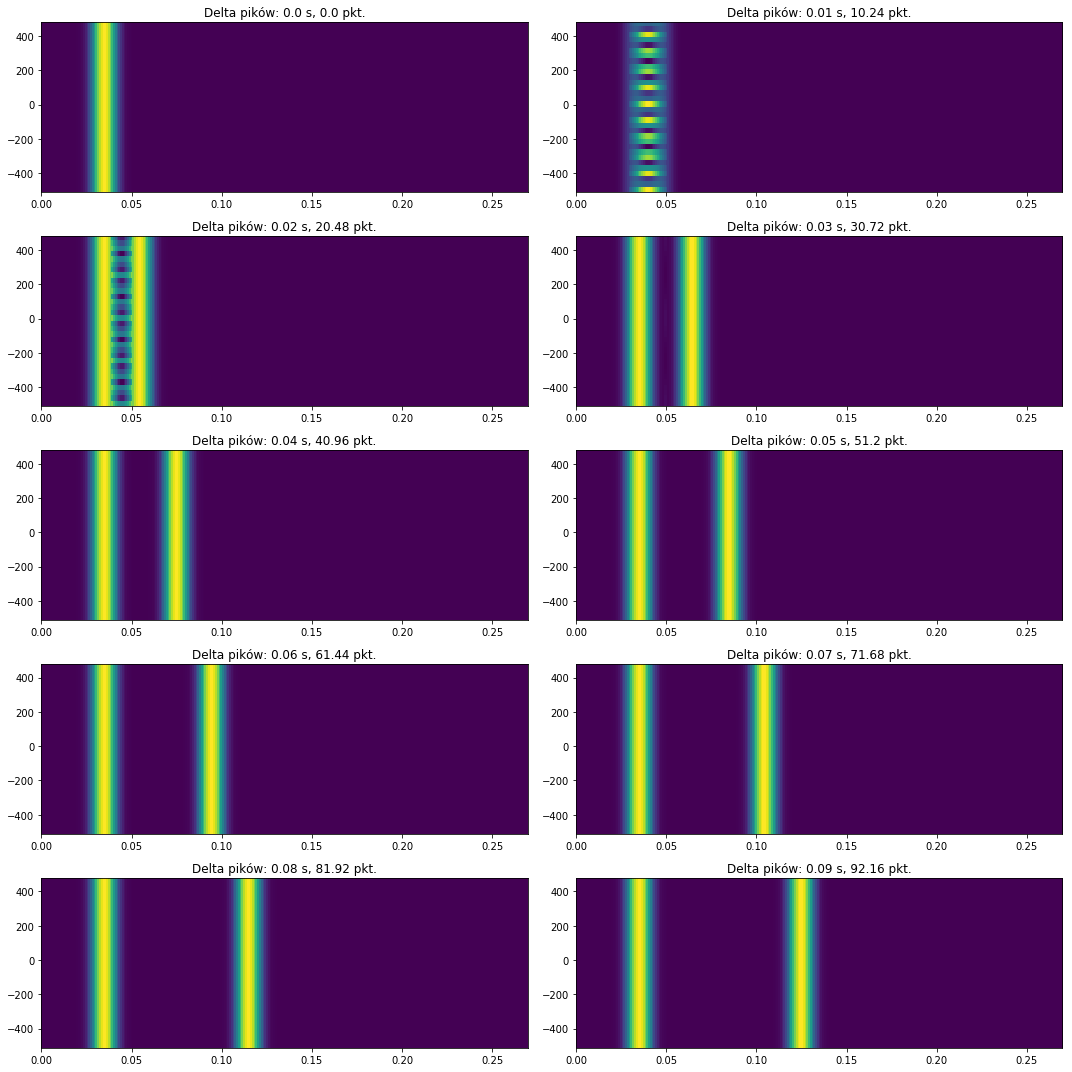

In [9]:
import matplotlib.pyplot as plt
def dirac(T,t_punkt,Fs):
    t = tf.czas(T = T, Fs = Fs)
    dirr = np.zeros(len(t))
    dirr[int(t_punkt*Fs)] = 1
    return dirr
T = 0.3
Fs = 1024
tp1 = 0.05
dir1 = dirac(T,tp1,Fs)
dir2_tp = np.arange(tp1,0.15,0.01)
dimx = 5
dimy = len(dir2_tp)//dimx 
print(dimy)
plt.figure(figsize=(8,8))
fig, ax = plt.subplots(dimx, dimy)
ax = ax.reshape(1,-1)
print(ax.shape)
for i,tp in enumerate(dir2_tp):
    
    dir2 = dirac(T,tp,Fs)
    s = dir1+dir2
    h = hamming(32)
    NFFT =len(h)
    P,f,t,im1 = specgram(s,NFFT = len(h),Fs = Fs,window = h, noverlap = len(h)-1,sides = 'twosided') 
#     plt.subplots(dimx,dimy)
    ax[0,i].title.set_text(f"Delta pików: {round(tp-tp1,4)} s, {round(tp-tp1,4)*Fs} pkt.")
    ax[0,i].imshow(P,aspect='auto',origin='lower',extent=(t[0]-(NFFT/2)/Fs,t[-1]-(NFFT/2)/Fs,f[0],f[-1]),interpolation='nearest')
py.tight_layout()
show()

3
(4, 3)


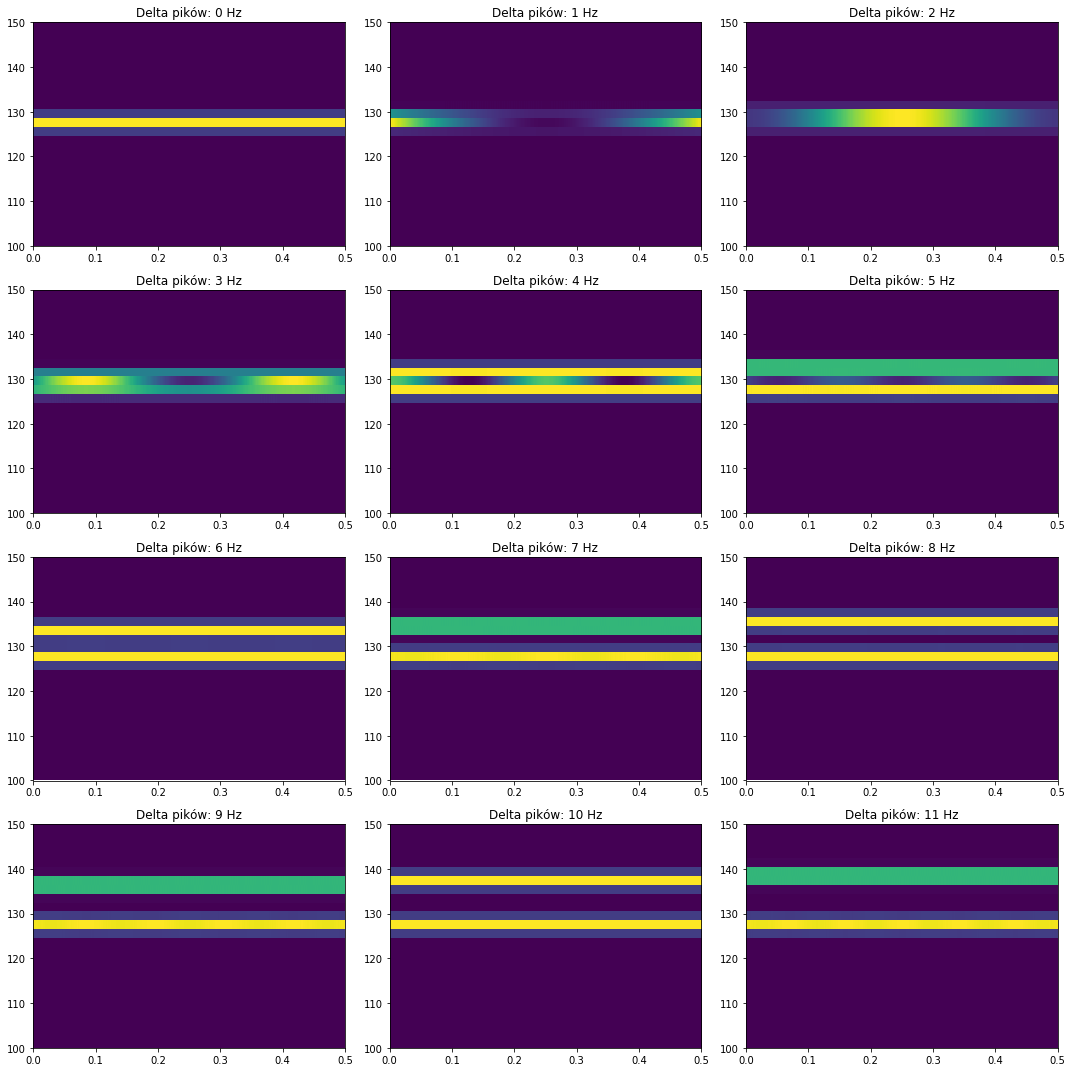

In [42]:
T = 1
Fs = 512
fq1 = 128
sin1 = tf.sin(fq1,T,Fs)
sin2_fq = np.arange(fq1,140,1)
dimx = 4
dimy = len(sin2_fq)//dimx 
print(dimy)
# plt.figure(figsize=(8,8))
fig, ax = plt.subplots(dimx, dimy)
print(ax.shape)
ax = ax.reshape(1,-1)

for i,fq in enumerate(sin2_fq):
    sin2 = tf.sin(fq,T,Fs)
    s = sin1+sin2
    h = hamming(256)
    NFFT =len(h)
    P,f,t,im1 = specgram(s,NFFT = len(h),Fs = Fs,window = h, noverlap = len(h)-1,sides = 'twosided') 
    ax[0,i].title.set_text(f"Delta pików: {round(fq-fq1,4)} Hz")
    ax[0,i].imshow(P,aspect='auto',origin='lower',extent=(t[0]-(NFFT/2)/Fs,t[-1]-(NFFT/2)/Fs,f[0],f[-1]),interpolation='nearest')
    ax[0,i].set_ylim(100,150)
    
py.tight_layout()
show()

4


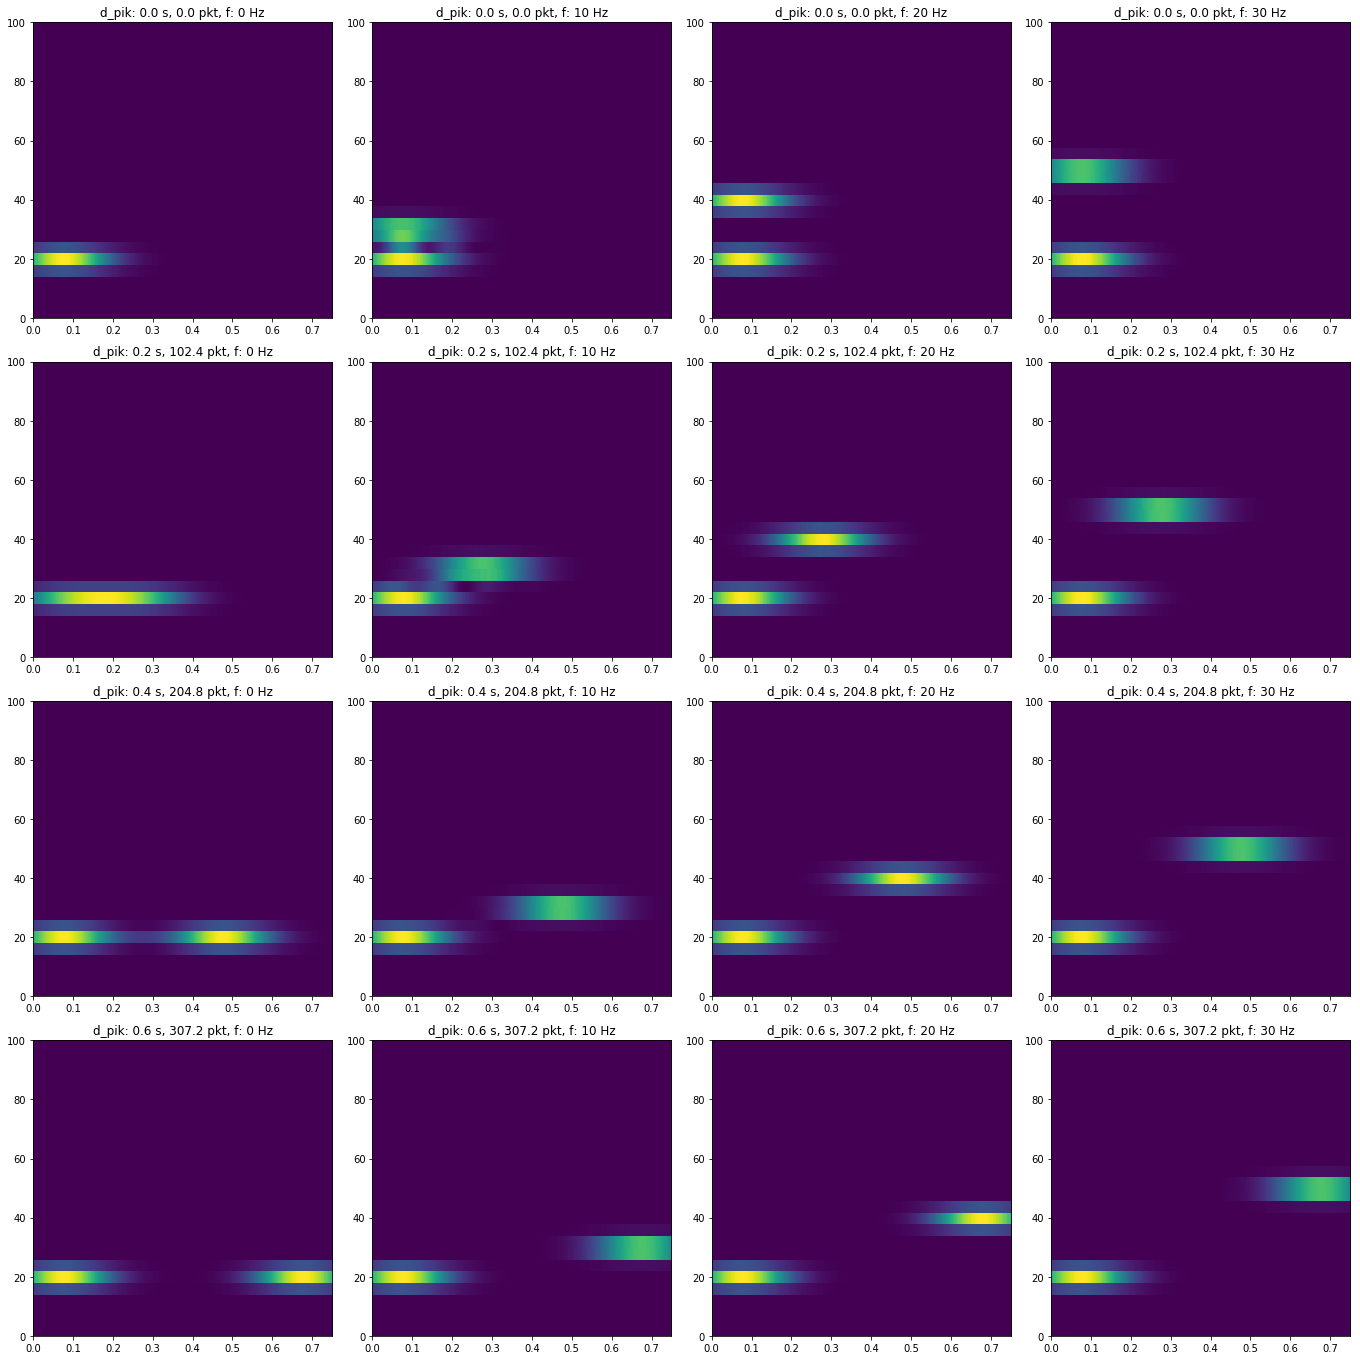

In [43]:
T = 1
Fs = 512
fq1 = 20
tp1 = 0.2
gab1 = tf.gabor(t0=tp1, T=T, f=fq1, Fs=Fs)
gabor_tp = np.arange(tp1, 0.81, 0.2)
gabor_fq = np.arange(fq1,60,10)
dimx = len(gabor_tp)
dimy = len(gabor_fq)
print(dimy)
fig, ax = plt.subplots(dimx, dimy,figsize=(19,19))
fig
ax = ax.reshape(1,-1)
i=0
for tp in gabor_tp:
    for fq in gabor_fq:
        gab2 = tf.gabor(t0=tp, T=T, f=fq, Fs=Fs)
        s = gab1+gab2
        h = hamming(128)
        NFFT =len(h)
        P,f,t,im1 = specgram(s,NFFT = len(h),Fs = Fs,window = h, noverlap = len(h)-1,sides = 'twosided') 
        ax[0,i].title.set_text(f"d_pik: {round(tp-tp1,4)} s, {round(tp-tp1,4)*Fs} pkt, f: {round(fq-fq1,4)} Hz")
        ax[0,i].imshow(P,aspect='auto',origin='lower',extent=(t[0]-(NFFT/2)/Fs,t[-1]-(NFFT/2)/Fs,f[0],f[-1]),interpolation='nearest')
        ax[0,i].set_ylim(0,100)
        i+=1
py.tight_layout()
show()

#  Proszę przyjrzeć się definicjom transformaty falkowej i STFT i opowiedzieć o analogiach i różnicach.

2
(1, 10)


<Figure size 576x576 with 0 Axes>

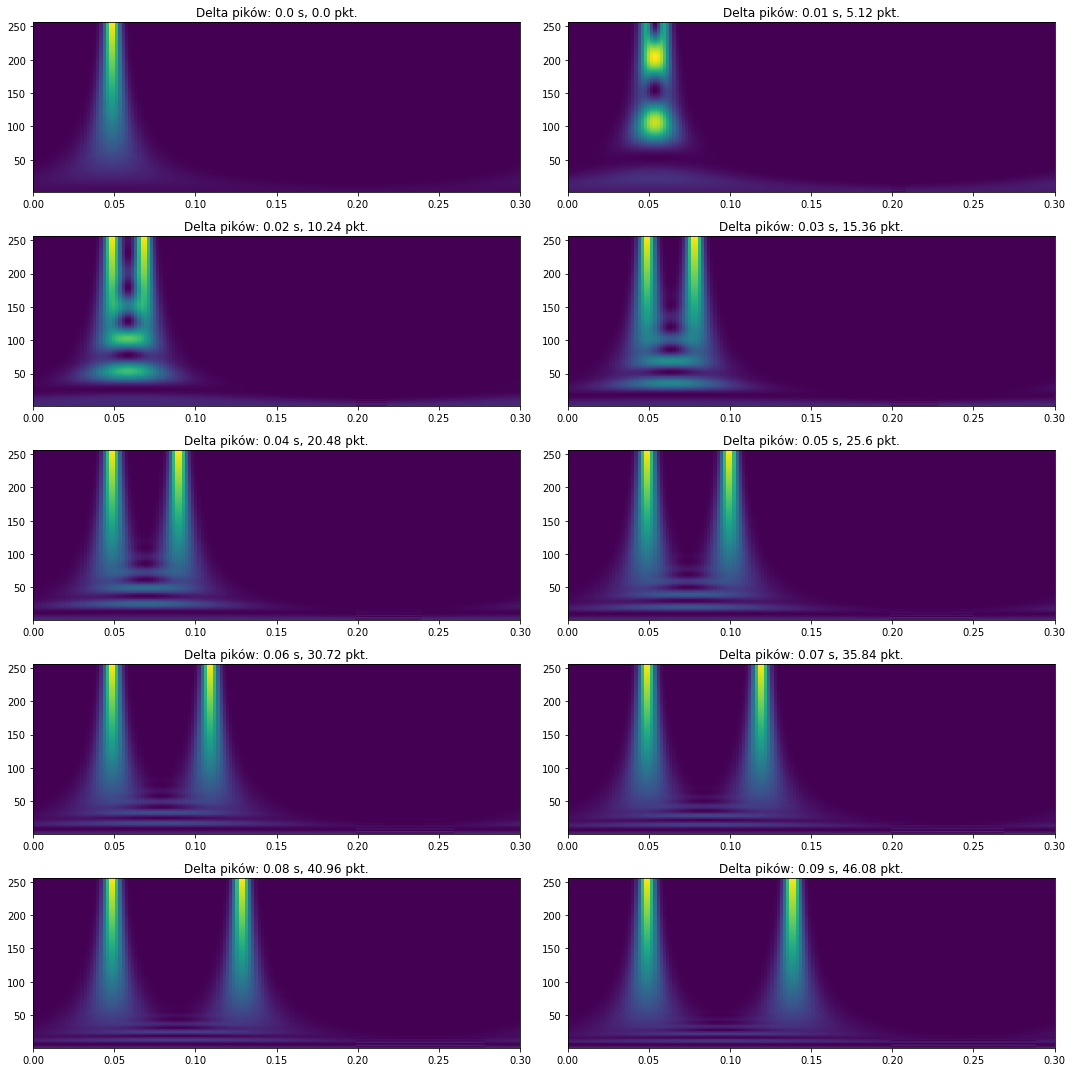

In [41]:
T = 0.3
Fs = 512
tp1 = 0.05
dir1 = dirac(T,tp1,Fs)
dir2_tp = np.arange(tp1,0.15,0.01)
dimx = 5
dimy = len(dir2_tp)//dimx 
print(dimy)
plt.figure(figsize=(8,8))
fig, ax = plt.subplots(dimx, dimy)
ax = ax.reshape(1,-1)
print(ax.shape)
MinF=1
MaxF=Fs//2
for i,tp in enumerate(dir2_tp):
    
    dir2 = dirac(T,tp,Fs)
    s = dir1+dir2
    h = hamming(32)
    NFFT =len(h)
    P,f,t = cwt(s, MinF=MinF,MaxF=MaxF,Fs=Fs,w=7.0,df=1.0,plot = False) 
#     plt.subplots(dimx,dimy)
    ax[0,i].title.set_text(f"Delta pików: {round(tp-tp1,4)} s, {round(tp-tp1,4)*Fs} pkt.")
    ax[0,i].imshow(P,aspect='auto',origin='lower',extent=(0,T,MinF, MaxF))
py.tight_layout()
show()

4
(4, 4)


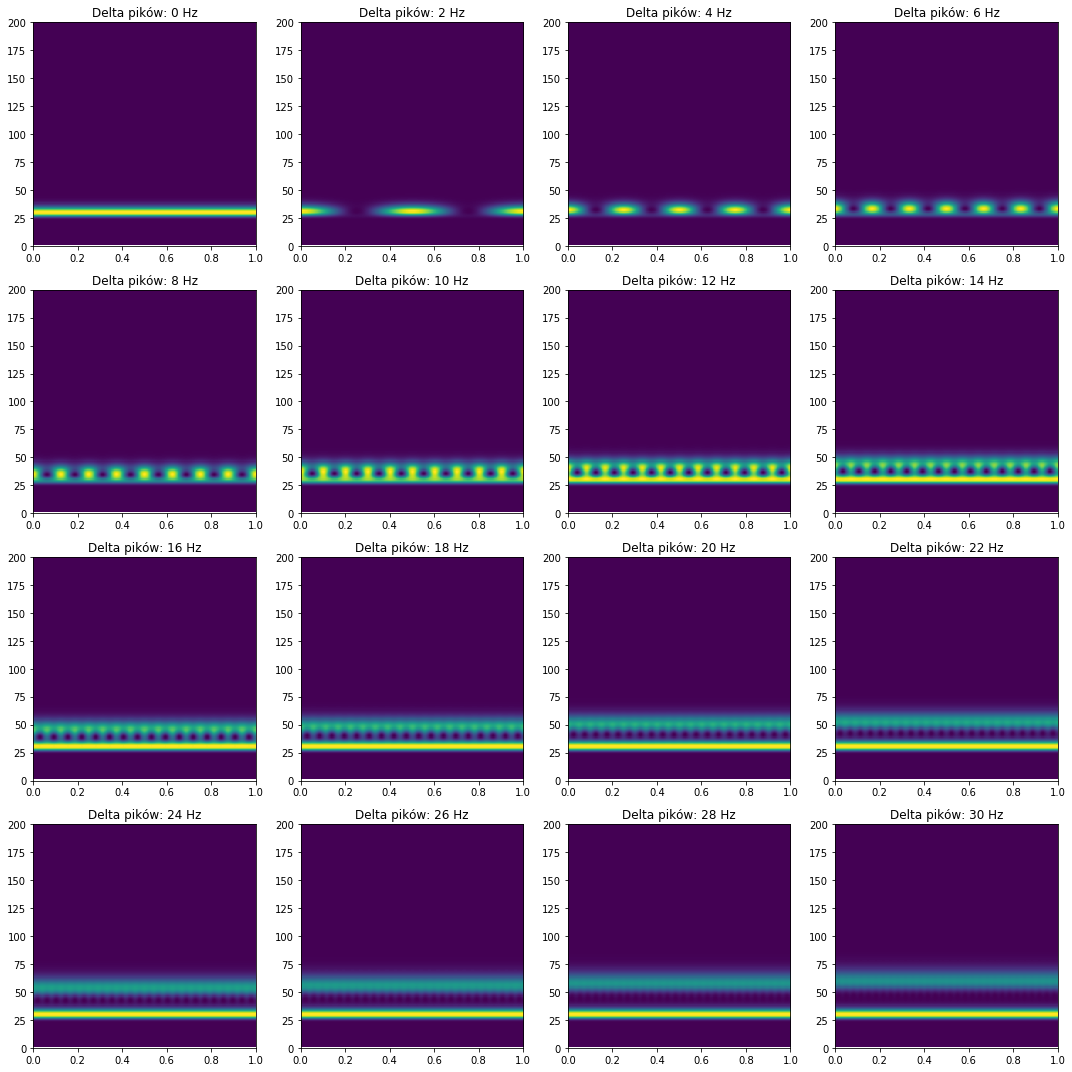

In [40]:
T = 1
Fs = 512
fq1 = 30
sin1 = tf.sin(fq1,T,Fs)
sin2_fq = np.arange(fq1,62,2)
dimx = 4
dimy = len(sin2_fq)//dimx 
print(dimy)
# plt.figure(figsize=(8,8))
fig, ax = plt.subplots(dimx, dimy)
print(ax.shape)
ax = ax.reshape(1,-1)
MinF=1
MaxF=Fs//2
for i,fq in enumerate(sin2_fq):
    sin2 = tf.sin(fq,T,Fs)
    s = sin1+sin2
    h = hamming(256)
    NFFT =len(h)
    P,f,t = cwt(s, MinF=MinF,MaxF=MaxF,Fs=Fs,w=7.0,df=1.0,plot = False) 
    ax[0,i].title.set_text(f"Delta pików: {round(fq-fq1,4)} Hz")
    ax[0,i].imshow(P,aspect='auto',origin='lower',extent=(0,T,MinF, MaxF))
    ax[0,i].set_ylim(0,200)
    
py.tight_layout()
show()

4
(4, 4)


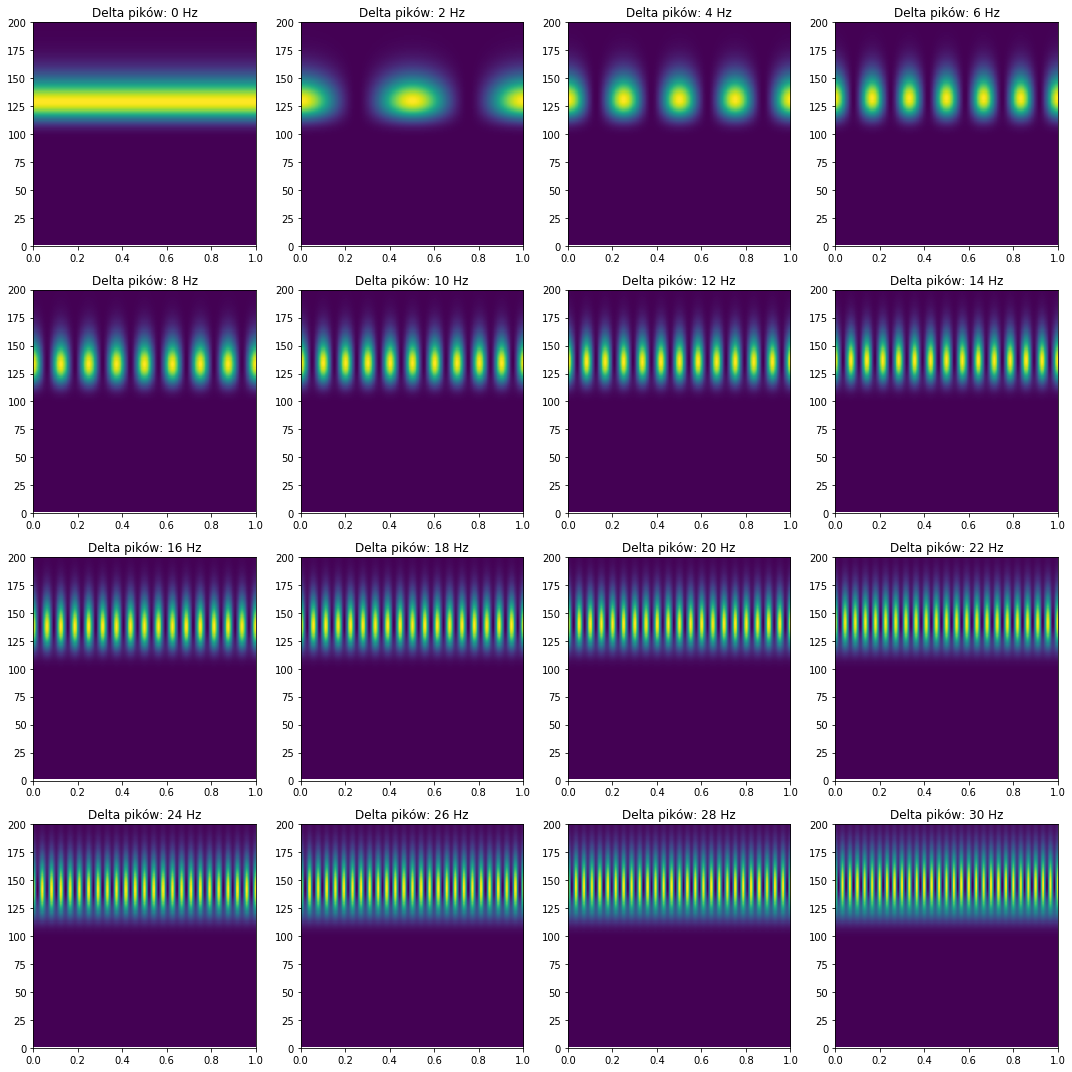

In [39]:
T = 1
Fs = 512
fq1 = 130
sin1 = tf.sin(fq1,T,Fs)
sin2_fq = np.arange(fq1,162,2)
dimx = 4
dimy = len(sin2_fq)//dimx 
print(dimy)
# plt.figure(figsize=(8,8))
fig, ax = plt.subplots(dimx, dimy)
print(ax.shape)
ax = ax.reshape(1,-1)
MinF=1
MaxF=Fs//2
for i,fq in enumerate(sin2_fq):
    sin2 = tf.sin(fq,T,Fs)
    s = sin1+sin2
    h = hamming(256)
    NFFT =len(h)
    P,f,t = cwt(s, MinF=MinF,MaxF=MaxF,Fs=Fs,w=7.0,df=1.0,plot = False) 
    ax[0,i].title.set_text(f"Delta pików: {round(fq-fq1,4)} Hz")
    ax[0,i].imshow(P,aspect='auto',origin='lower',extent=(0,T,MinF, MaxF))
    ax[0,i].set_ylim(0,200)
    
py.tight_layout()
show()

4


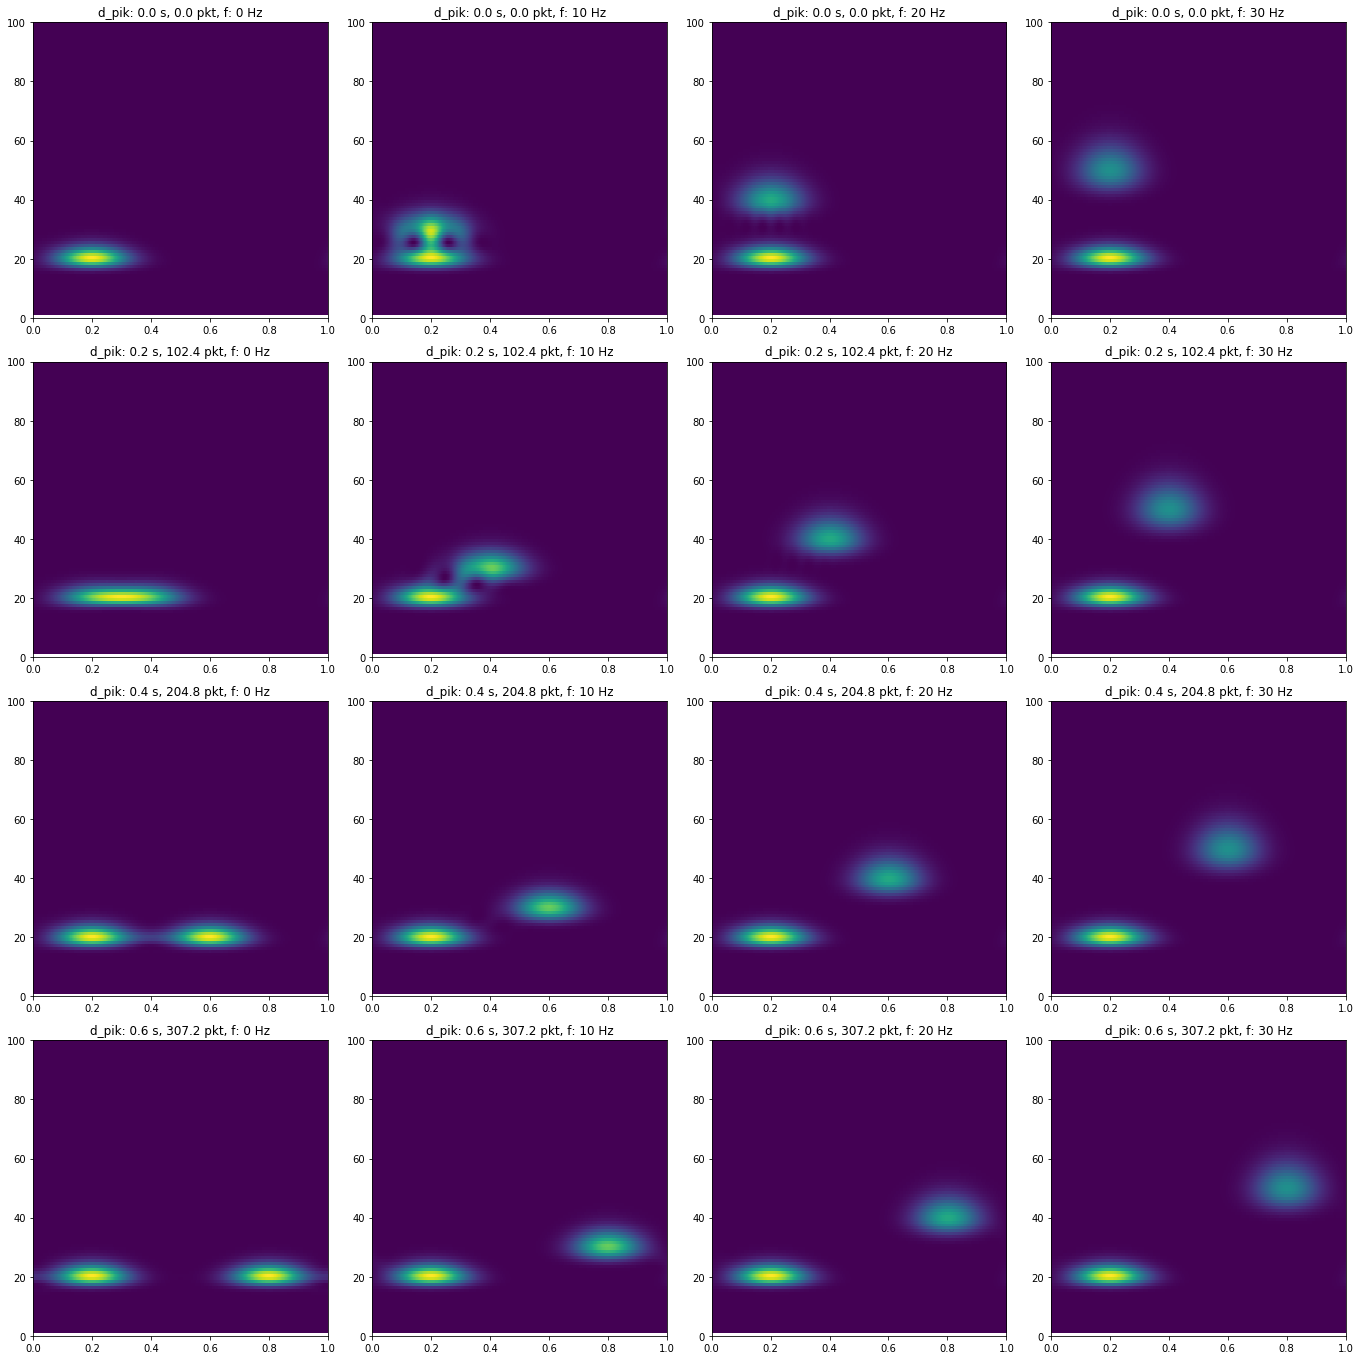

In [34]:
T = 1
Fs = 512
fq1 = 20
tp1 = 0.2
gab1 = tf.gabor(t0=tp1, T=T, f=fq1, Fs=Fs)
gabor_tp = np.arange(tp1, 0.81, 0.2)
gabor_fq = np.arange(fq1,60,10)
dimx = len(gabor_tp)
dimy = len(gabor_fq)
print(dimy)
fig, ax = plt.subplots(dimx, dimy,figsize=(19,19))
fig
ax = ax.reshape(1,-1)
MinF=1
MaxF=Fs//2
i=0
for tp in gabor_tp:
    for fq in gabor_fq:
        gab2 = tf.gabor(t0=tp, T=T, f=fq, Fs=Fs)
        s = gab1+gab2
        h = hamming(128)
        NFFT =len(h)
        P,f,t = cwt(s, MinF=MinF,MaxF=MaxF,Fs=Fs,w=7.0,df=1.0,plot = False)  
        ax[0,i].title.set_text(f"d_pik: {round(tp-tp1,4)} s, {round(tp-tp1,4)*Fs} pkt, f: {round(fq-fq1,4)} Hz")
        ax[0,i].imshow(P,aspect='auto',origin='lower',extent=(0,T,MinF, MaxF))
        ax[0,i].set_ylim(0,100)
        i+=1
py.tight_layout()
show()

4


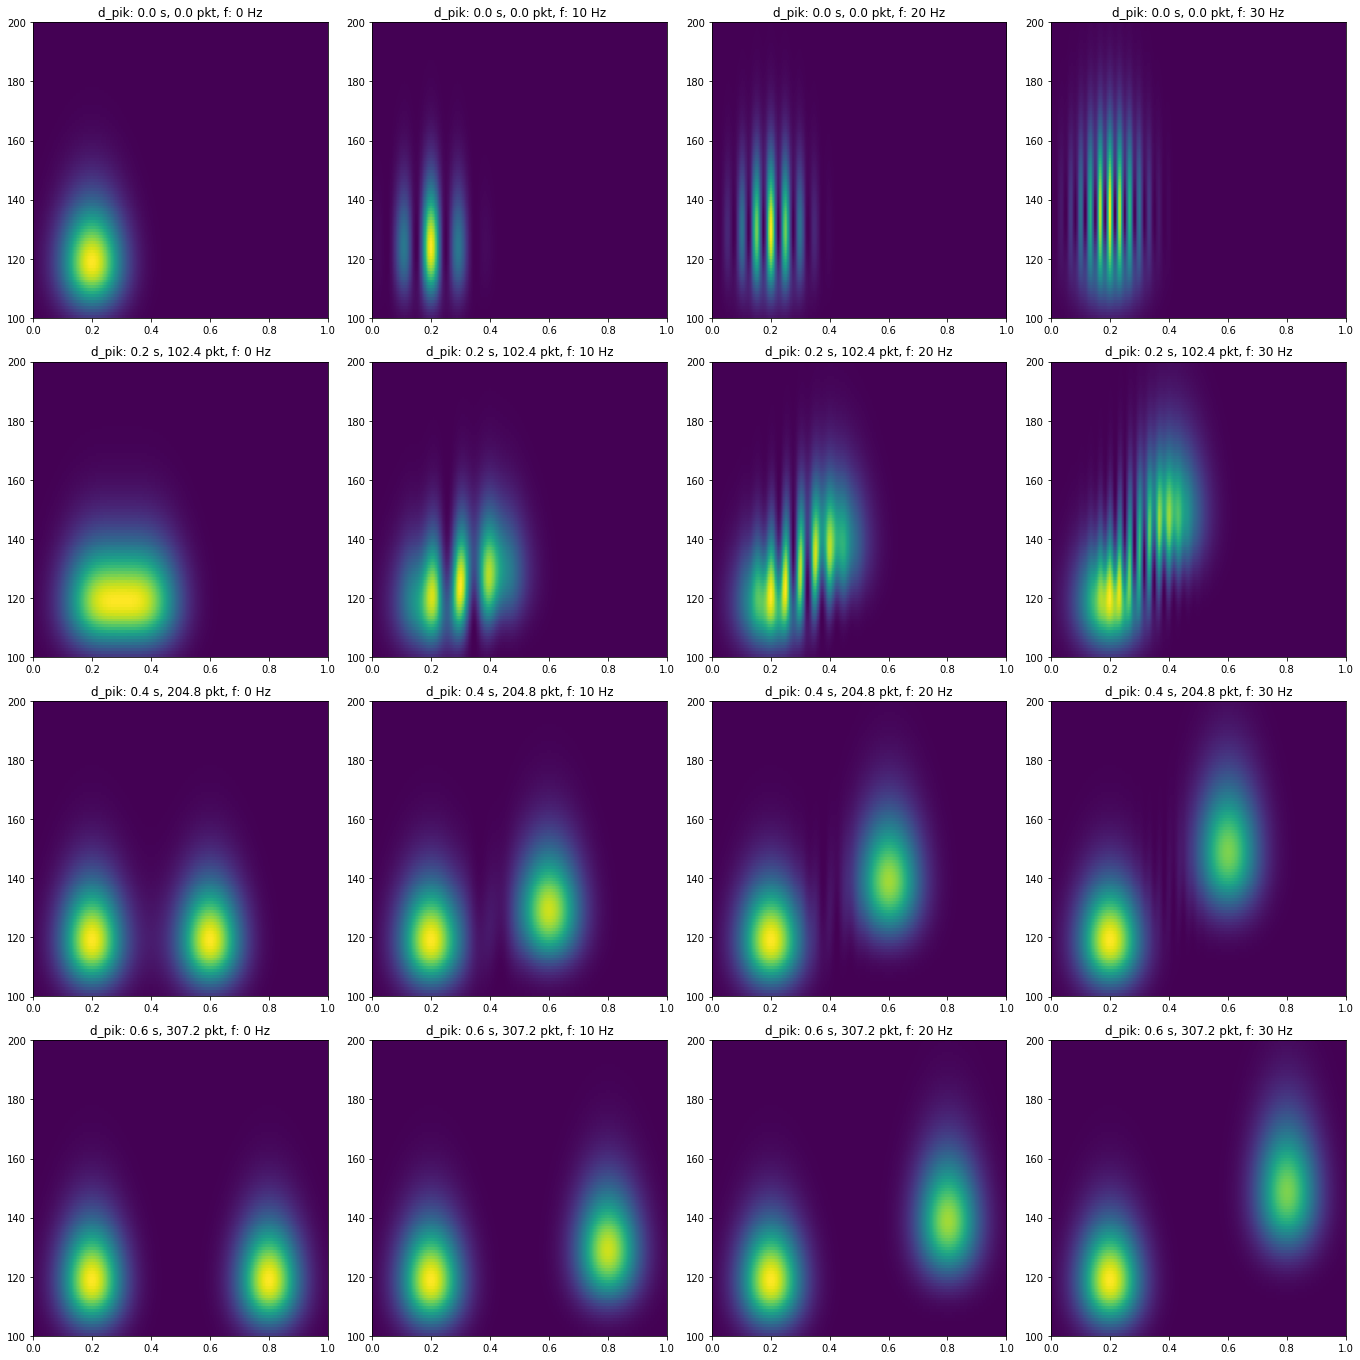

In [37]:
T = 1
Fs = 512
fq1 = 120
tp1 = 0.2
gab1 = tf.gabor(t0=tp1, T=T, f=fq1, Fs=Fs)
gabor_tp = np.arange(tp1, 0.81, 0.2)
gabor_fq = np.arange(fq1,160,10)
dimx = len(gabor_tp)
dimy = len(gabor_fq)
print(dimy)
fig, ax = plt.subplots(dimx, dimy,figsize=(19,19))
fig
ax = ax.reshape(1,-1)
MinF=1
MaxF=Fs//2
i=0
for tp in gabor_tp:
    for fq in gabor_fq:
        gab2 = tf.gabor(t0=tp, T=T, f=fq, Fs=Fs)
        s = gab1+gab2
        h = hamming(256)
        NFFT =len(h)
        P,f,t = cwt(s, MinF=MinF,MaxF=MaxF,Fs=Fs,w=7.0,df=1.0,plot = False)  
        ax[0,i].title.set_text(f"d_pik: {round(tp-tp1,4)} s, {round(tp-tp1,4)*Fs} pkt, f: {round(fq-fq1,4)} Hz")
        ax[0,i].imshow(P,aspect='auto',origin='lower',extent=(0,T,MinF, MaxF))
        ax[0,i].set_ylim(100,200)
        i+=1
py.tight_layout()
show()

# MACZING PERSJUT

### zad 1

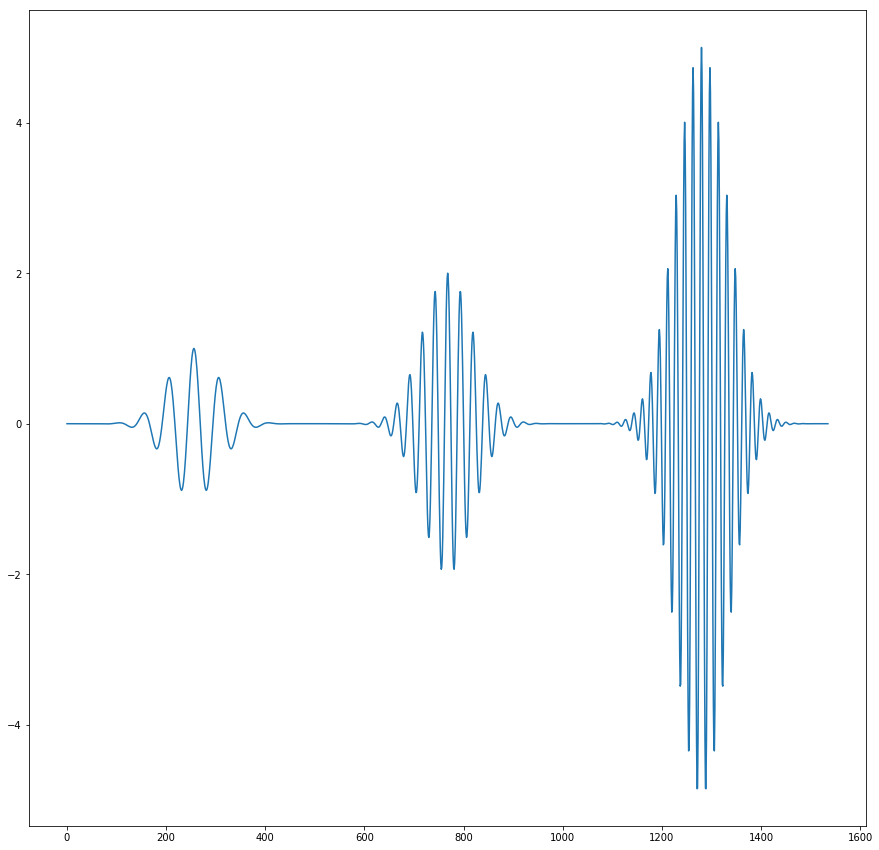

In [50]:
sigma = 0.1
Fs = 512
T = 3
f = (10,20,30)
A = (1,2,5)
t0 = (0.5,1.5,2.5)
gabor0 = A[0]*tf.gabor(t0 = t0[0],sigma = sigma, T = T, f=f[0], phi = 0, Fs = Fs)
gabor1 = A[1]*tf.gabor(t0 = t0[1],sigma = sigma, T = T, f=f[1], phi = 0, Fs = Fs)
gabor2 = A[2]*tf.gabor(t0 = t0[2],sigma = sigma, T = T, f=f[2], phi = 0, Fs = Fs)

gabor_suma = gabor1+gabor2+gabor0
plt.plot(gabor_suma)
plt.plot()
plik=open("gabor_sum.raw",'wb')
plik.write(gabor_suma)
plik.close()

In [115]:
from book_reader import *
bookName = 'gabor_sum.b'
book = BookImporter(bookName)

In [116]:
Eatoms = 0 # będziemy dla kontroli liczyć energię atomów, na początek zerujemy licznik

rekonstrukcja = np.zeros(book.epoch_s) # Przygotowujemy tablicę, w której powstanie rekonstrukcja.
t = np.arange(0,book.epoch_s/book.fs,1/book.fs) # Przygotowujemy wektor czasu. 

numerEpoki = 1                                                # Posłuży on nam do odtwarzania poszczególnych atomów
for atom in book.atoms[numerEpoki]:     # iterujemy się po atomach danej epoki
    f_Hz  = atom['params']['f']*book.fs/2    # przekodowujemy częstość atomu na częstość w Hz
    A     = atom['params']['amplitude']      # odczytujemy amplitudę
    faza  = atom['params']['phase']          # odczytujemy fazę
    t0    = atom['params']['t']/book.fs       # przeliczamy pozycję atomu z wartości w próbkach na wartości w sek.
    skala = atom['params']['scale']/book.fs   # szerokość atomu w czasie (w sek.)
    rekonstrukcja += A * np.exp(-np.pi*((t-t0)/skala)**2)*np.cos(2*np.pi*f_Hz*(t-t0)+faza) # obliczamy przebieg czasowy atomu (funkcja Gabora) i 
                                                                                            # dodajemy do rekonstrukcji
    Eatoms += atom['params']['modulus']**2 # kwadrat parametru modulus to energia niesiona przez dany atom
    

In [117]:
for i, numerEpoki in enumerate(book.atoms): # iterujemy się po epokach: 
    print(i , numerEpoki)      

0 1


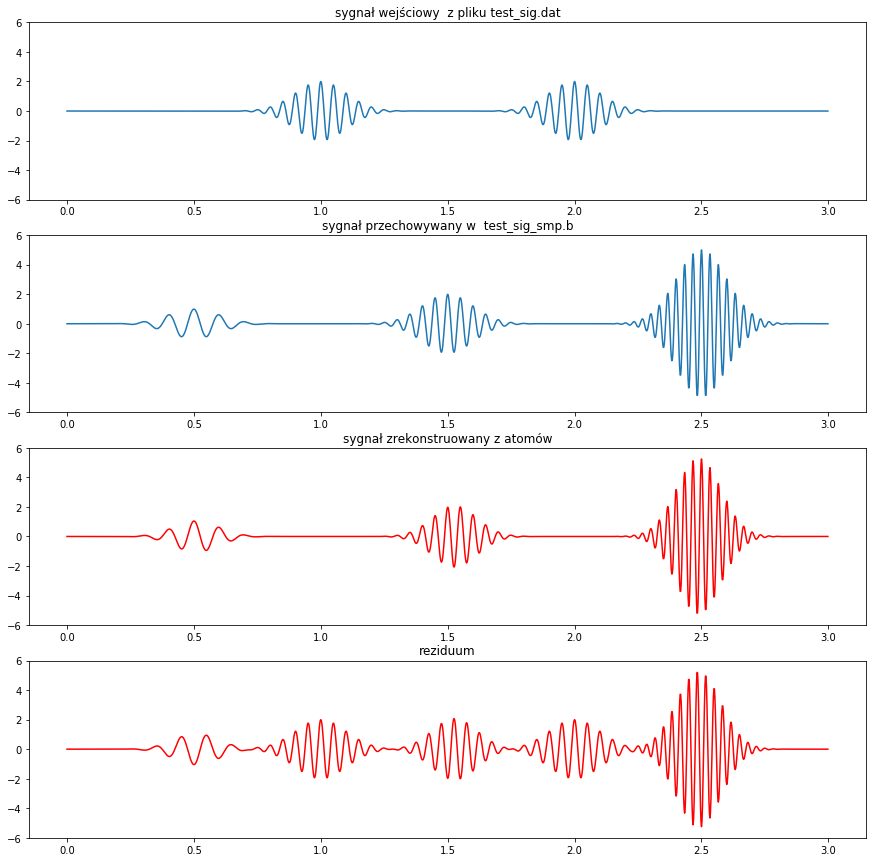

In [118]:
py.subplot(411)
py.plot(t,gabor_suma)
py.ylim((-6,6))
py.title('sygnał wejściowy  z pliku test_sig.dat')
py.subplot(412)
py.plot(t,book.signals[1][0])
py.ylim((-6,6))
py.title('sygnał przechowywany w  test_sig_smp.b')
# te powyższe sygnały powinny być takie same
py.subplot(413)
py.plot(t,rekonstrukcja,'r')
py.ylim((-6,6))
py.title('sygnał zrekonstruowany z atomów')
py.subplot(414)
py.plot(t,gabor_suma - rekonstrukcja,'r')
py.ylim((-6,6))
py.title('reziduum')
py.show()

In [119]:
Esignal = sum(book.signals[1][0]**2) 
print('Energia sygnału: ', np.round(Esignal,1))
print('Energia atomów: ', np.round(Eatoms,1))
print('procent wyjaśnionej energii: ', np.round(Eatoms/Esignal*100,1), '%')

Energia sygnału:  1357.0
Energia atomów:  1330.6
procent wyjaśnionej energii:  98.1 %


In [126]:
N = int(book.fs)
Eatoms = 0
f = np.linspace(0, Fs / 2, N)
rec_t = np.zeros((1,book.epoch_s))
rec_f = np.zeros((int(book.fs),1))

mapaEnergii = np.zeros(( int(book.fs), book.epoch_s)) # Przygotowujemy tablicę, w której powstanie reprezentacja czas-częstość.
rekonstrukcja = np.zeros(book.epoch_s) # Przygotowujemy tablicę, w której powstanie rekonstrukcja.
t = np.arange(0,book.epoch_s/book.fs,1/book.fs) # Przygotowujemy wektor czasu. 
                                                # Posłuży on nam do odtwarzania poszczególnych atomów
numerEpoki = 1                                                
for atom in book.atoms[numerEpoki]:     # iterujemy się po atomach danej epoki
    f_Hz  = atom['params']['f']*book.fs/2     # przekodowujemy częstość atomu na częstość w Hz
    A     = atom['params']['amplitude']       # odczytujemy amplitudę
    faza  = atom['params']['phase']           # odczytujemy fazę
    t0    = atom['params']['t']/book.fs       # przeliczamy pozycję atomu z wartości w próbkach na wartości w sek.
    skala = atom['params']['scale']/book.fs   # szerokość atomu w czasie (w sek.)
   
    rec_t[0,:] = np.exp(-np.pi*((t-t0)/skala)**2)     # obliczamy obwiednię czasową -> dla f. Gabora jest to f. Gaussa
    rec_f[:,0] = np.exp(-np.pi*((f-f_Hz)*skala)**2)   # obliczamy obwiednię częstotliwościową -> dla f. Gabora jest to f. Gaussa
    tfr_atom = np.kron(rec_t,rec_f) # przemnażamy przez siebie obwiednie -> to jest reprezentacja czas-częstość pojedynczego atomu
    tfr_atom/= np.sum(np.sum(tfr_atom))  # normalizujemy
    tfr_atom *= atom['params']['modulus']**2 # skalujemy energię
    mapaEnergii += tfr_atom # dajemy ją do mapy 
    rekonstrukcja += A * np.exp(-np.pi*((t-t0)/skala)**2)*np.cos(2*np.pi*f_Hz*(t-t0)+faza) # obliczamy przebieg czasowy atomu (funkcja Gabora) i 

In [127]:
def TFRPlot(TFR, t_mapy, f_mapy, sig, Fs=128,title ='', limits=None):
    '''
    Funkcja do rysowania map czas-częstość z sygnałem zaprezentowanym poniżej
    TFR - mapa czas-częstość (time-freqyency representation
    t_mapy, f_mapy - wektory reprezentujące osie czasu i częstości
    sig - sygnał do wyrysowania pod mapą (np. ten, z którego powstała mapa)
    Fs - częstość próbkowania sygnału 
    title - tytuł do wyświetlenia ponad mapą
    '''
    df = f_mapy[1]-f_mapy[0]
    dt = t_mapy[1]-t_mapy[0]
    t = np.arange(0,len(sig))/Fs
    sygAxes = py.axes([0.05, 0.05, 0.8, 0.1])
    tfAxes = py.axes([0.05, 0.15, 0.8, 0.8])
    sygAxes.plot(t,sig)
    sygAxes.set_xlim((t_mapy.min(), t_mapy.max()))
    #py.setp(sygAxes, yticklabels=[])
    tfAxes.imshow(TFR,aspect='auto',origin='lower',interpolation='lanczos', 
                  extent=(t_mapy.min()-dt/2,t_mapy.max()+dt/2,f_mapy.min()-df/2,f_mapy.max()+df/2), cmap="plasma")
    py.setp(tfAxes,xticklabels=[])
    py.title(title)
    if limits is not None:
        py.ylim(limits)
    py.show()

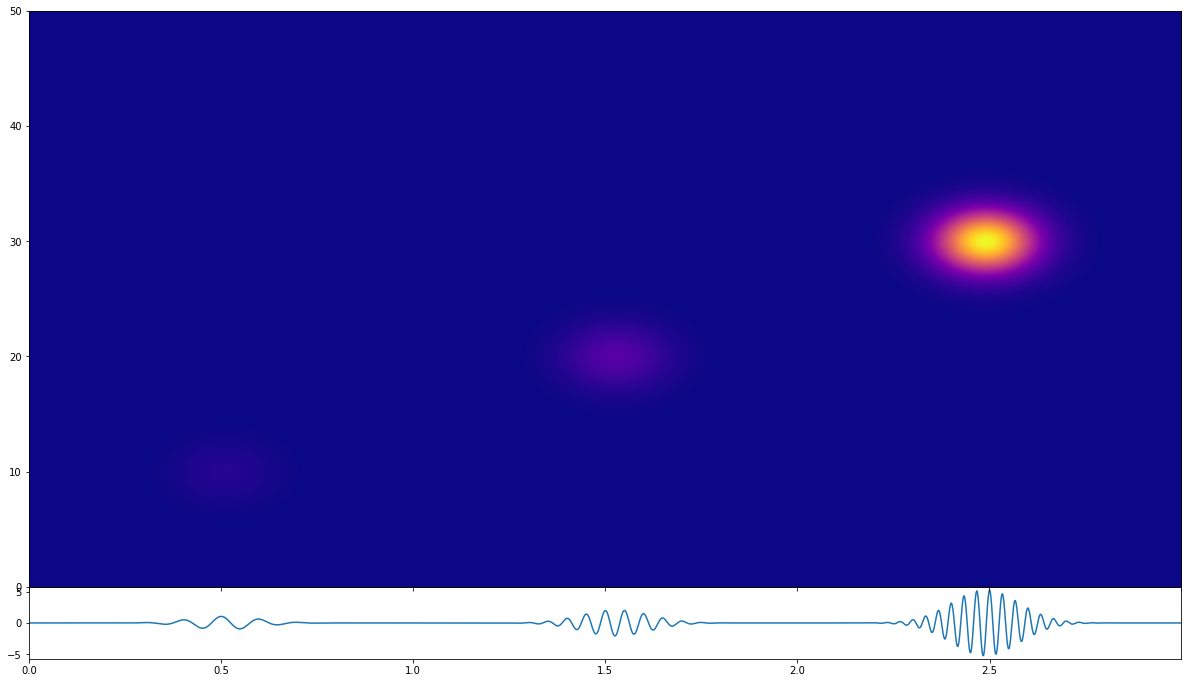

In [128]:
py.figure(figsize=(20,10))
TFRPlot(mapaEnergii, t, f, rekonstrukcja, Fs=book.fs,title ='', limits=(0,50)) 

### zad 2

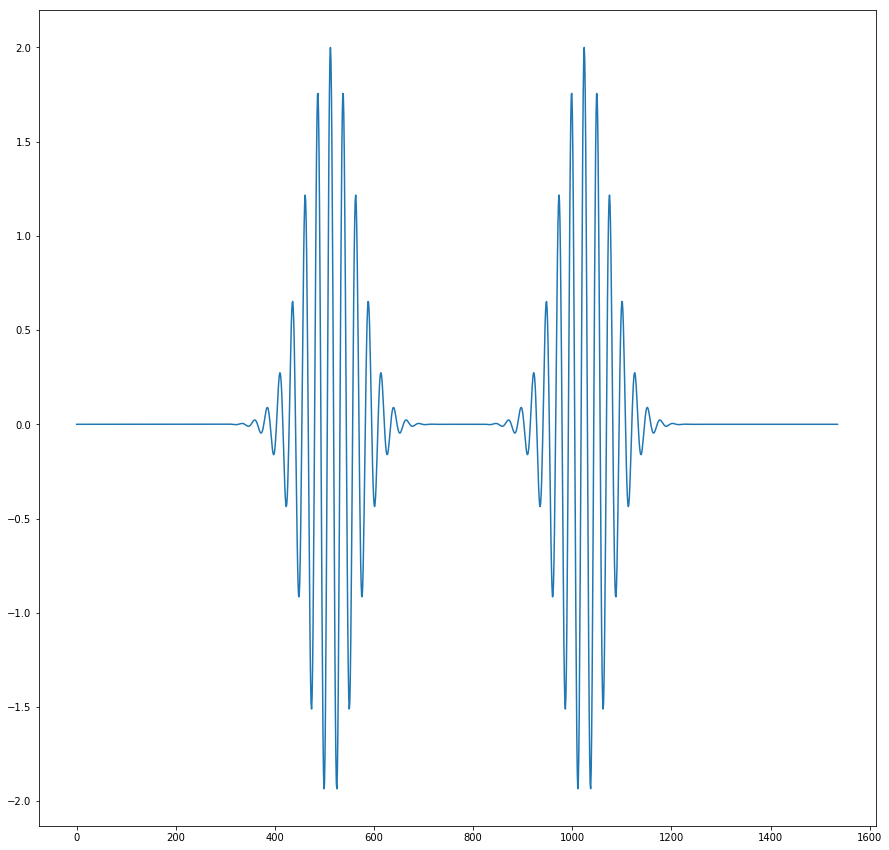

In [138]:
name = 'gabory_dwa_1'

sigma = 0.1
Fs = 512
T = 3
f = (20,20,)
A = (2,2,)
t0 = (1,2,)
gabor0 = A[0]*tf.gabor(t0 = t0[0],sigma = sigma, T = T, f=f[0], phi = 0, Fs = Fs)
gabor1 = A[1]*tf.gabor(t0 = t0[1],sigma = sigma, T = T, f=f[1], phi = 0, Fs = Fs)

gabor_suma = gabor0+gabor1
plt.plot(gabor_suma)
plt.plot()
plik=open(f"{name}.raw",'wb')
plik.write(gabor_suma)
plik.close()

Energia sygnału:  361.2
Energia atomów:  350.9
procent wyjaśnionej energii:  97.1 %


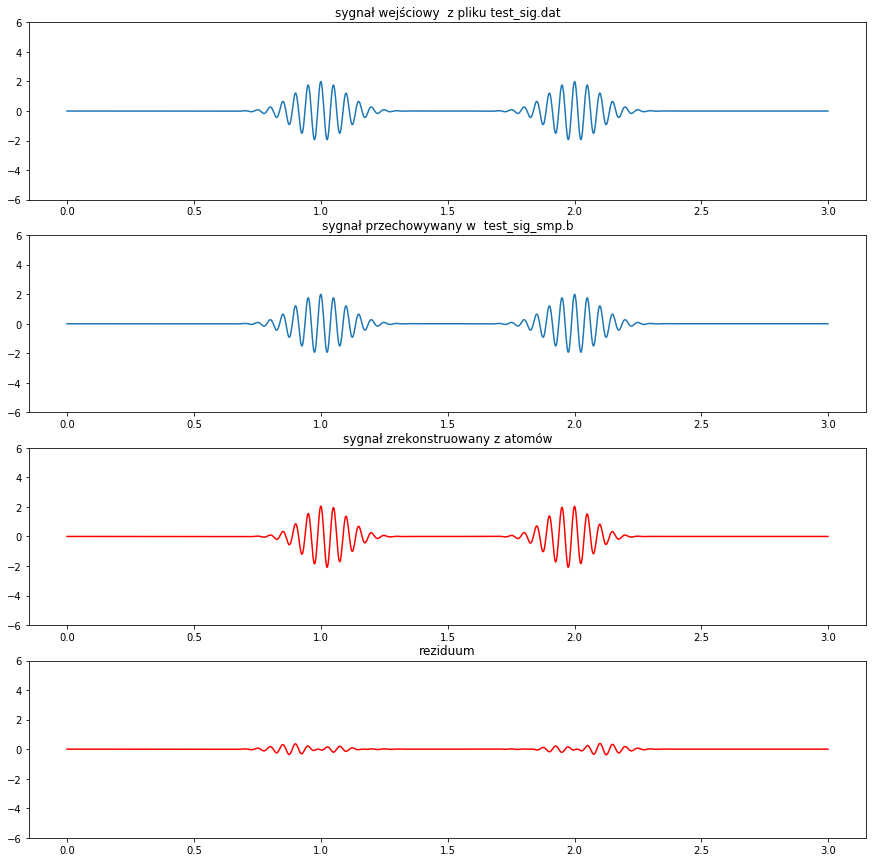

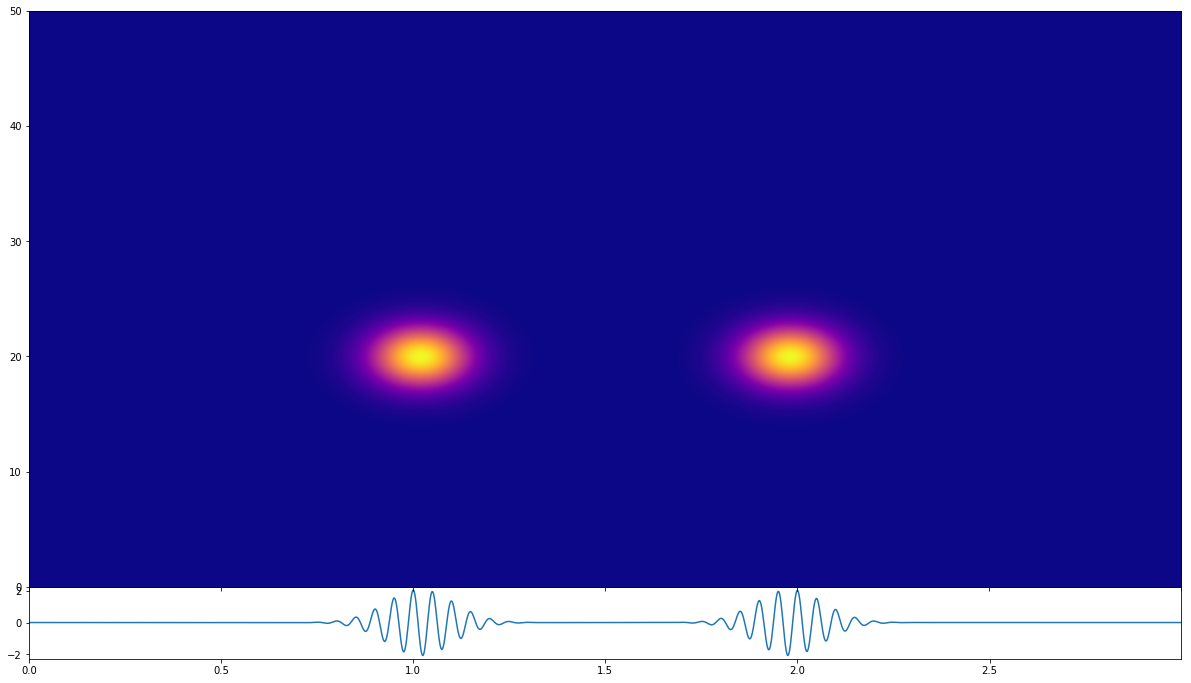

In [137]:


bookName = f'{name}.b'
book = BookImporter(bookName)
Eatoms = 0 # będziemy dla kontroli liczyć energię atomów, na początek zerujemy licznik

rekonstrukcja = np.zeros(book.epoch_s) # Przygotowujemy tablicę, w której powstanie rekonstrukcja.
t = np.arange(0,book.epoch_s/book.fs,1/book.fs) # Przygotowujemy wektor czasu. 

numerEpoki = 1                                                # Posłuży on nam do odtwarzania poszczególnych atomów
for atom in book.atoms[numerEpoki]:     # iterujemy się po atomach danej epoki
    f_Hz  = atom['params']['f']*book.fs/2    # przekodowujemy częstość atomu na częstość w Hz
    A     = atom['params']['amplitude']      # odczytujemy amplitudę
    faza  = atom['params']['phase']          # odczytujemy fazę
    t0    = atom['params']['t']/book.fs       # przeliczamy pozycję atomu z wartości w próbkach na wartości w sek.
    skala = atom['params']['scale']/book.fs   # szerokość atomu w czasie (w sek.)
    rekonstrukcja += A * np.exp(-np.pi*((t-t0)/skala)**2)*np.cos(2*np.pi*f_Hz*(t-t0)+faza) # obliczamy przebieg czasowy atomu (funkcja Gabora) i 
                                                                                            # dodajemy do rekonstrukcji
    Eatoms += atom['params']['modulus']**2 # kwadrat parametru modulus to energia niesiona przez dany atom
    
Esignal = sum(book.signals[1][0]**2) 
print('Energia sygnału: ', np.round(Esignal,1))
print('Energia atomów: ', np.round(Eatoms,1))
print('procent wyjaśnionej energii: ', np.round(Eatoms/Esignal*100,1), '%')


    
py.subplot(411)
py.plot(t,gabor_suma)
py.ylim((-6,6))
py.title('sygnał wejściowy  z pliku test_sig.dat')
py.subplot(412)
py.plot(t,book.signals[1][0])
py.ylim((-6,6))
py.title('sygnał przechowywany w  test_sig_smp.b')
# te powyższe sygnały powinny być takie same
py.subplot(413)
py.plot(t,rekonstrukcja,'r')
py.ylim((-6,6))
py.title('sygnał zrekonstruowany z atomów')
py.subplot(414)
py.plot(t,gabor_suma - rekonstrukcja,'r')
py.ylim((-6,6))
py.title('reziduum')
py.show()
py.figure(figsize=(20,10))

N = int(book.fs)
Eatoms = 0
f = np.linspace(0, Fs / 2, N)
rec_t = np.zeros((1,book.epoch_s))
rec_f = np.zeros((int(book.fs),1))

mapaEnergii = np.zeros(( int(book.fs), book.epoch_s)) # Przygotowujemy tablicę, w której powstanie reprezentacja czas-częstość.
rekonstrukcja = np.zeros(book.epoch_s) # Przygotowujemy tablicę, w której powstanie rekonstrukcja.
t = np.arange(0,book.epoch_s/book.fs,1/book.fs) # Przygotowujemy wektor czasu. 
                                                # Posłuży on nam do odtwarzania poszczególnych atomów
numerEpoki = 1                                                
for atom in book.atoms[numerEpoki]:     # iterujemy się po atomach danej epoki
    f_Hz  = atom['params']['f']*book.fs/2     # przekodowujemy częstość atomu na częstość w Hz
    A     = atom['params']['amplitude']       # odczytujemy amplitudę
    faza  = atom['params']['phase']           # odczytujemy fazę
    t0    = atom['params']['t']/book.fs       # przeliczamy pozycję atomu z wartości w próbkach na wartości w sek.
    skala = atom['params']['scale']/book.fs   # szerokość atomu w czasie (w sek.)
   
    rec_t[0,:] = np.exp(-np.pi*((t-t0)/skala)**2)     # obliczamy obwiednię czasową -> dla f. Gabora jest to f. Gaussa
    rec_f[:,0] = np.exp(-np.pi*((f-f_Hz)*skala)**2)   # obliczamy obwiednię częstotliwościową -> dla f. Gabora jest to f. Gaussa
    tfr_atom = np.kron(rec_t,rec_f) # przemnażamy przez siebie obwiednie -> to jest reprezentacja czas-częstość pojedynczego atomu
    tfr_atom/= np.sum(np.sum(tfr_atom))  # normalizujemy
    tfr_atom *= atom['params']['modulus']**2 # skalujemy energię
    mapaEnergii += tfr_atom # dajemy ją do mapy 
    rekonstrukcja += A * np.exp(-np.pi*((t-t0)/skala)**2)*np.cos(2*np.pi*f_Hz*(t-t0)+faza) # obliczamy przebieg czasowy atomu (funkcja Gabora) i 

TFRPlot(mapaEnergii, t, f, rekonstrukcja, Fs=book.fs,title ='', limits=(0,50)) 

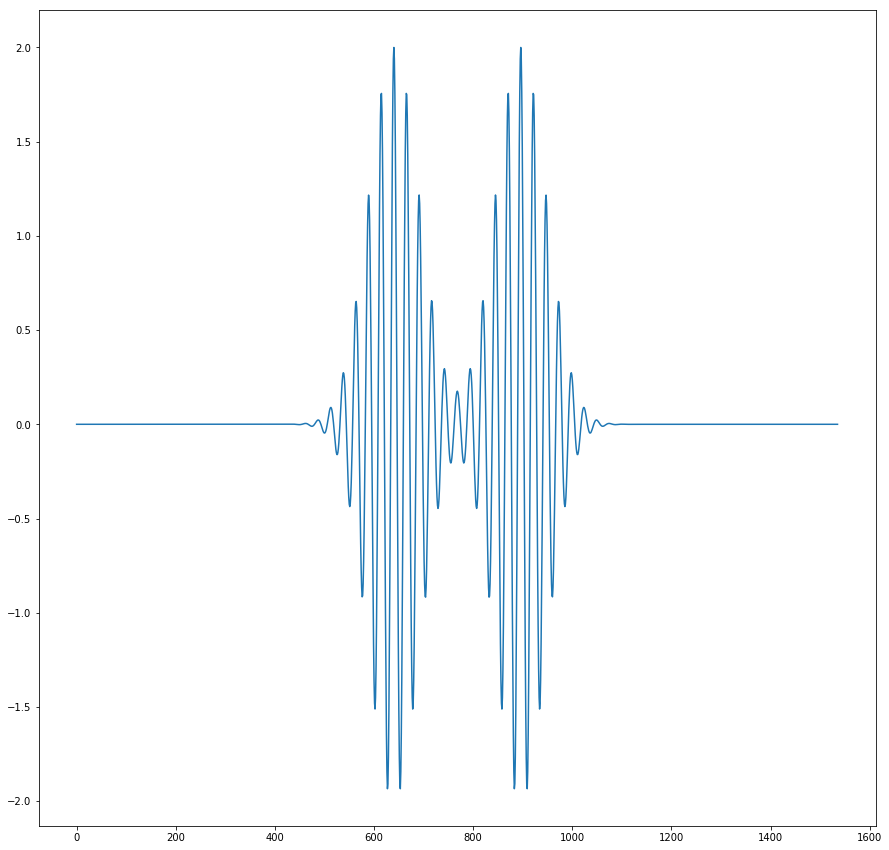

In [141]:
name = 'gabory_dwa_2'

sigma = 0.1
Fs = 512
T = 3
f = (20,20,)
A = (2,2,)
t0 = (1.25,1.75,)
gabor0 = A[0]*tf.gabor(t0 = t0[0],sigma = sigma, T = T, f=f[0], phi = 0, Fs = Fs)
gabor1 = A[1]*tf.gabor(t0 = t0[1],sigma = sigma, T = T, f=f[1], phi = 0, Fs = Fs)

gabor_suma = gabor0+gabor1
plt.plot(gabor_suma)
plt.plot()
plik=open(f"{name}.raw",'wb')
plik.write(gabor_suma)
plik.close()

Energia sygnału:  361.9
Energia atomów:  356.8
procent wyjaśnionej energii:  98.6 %


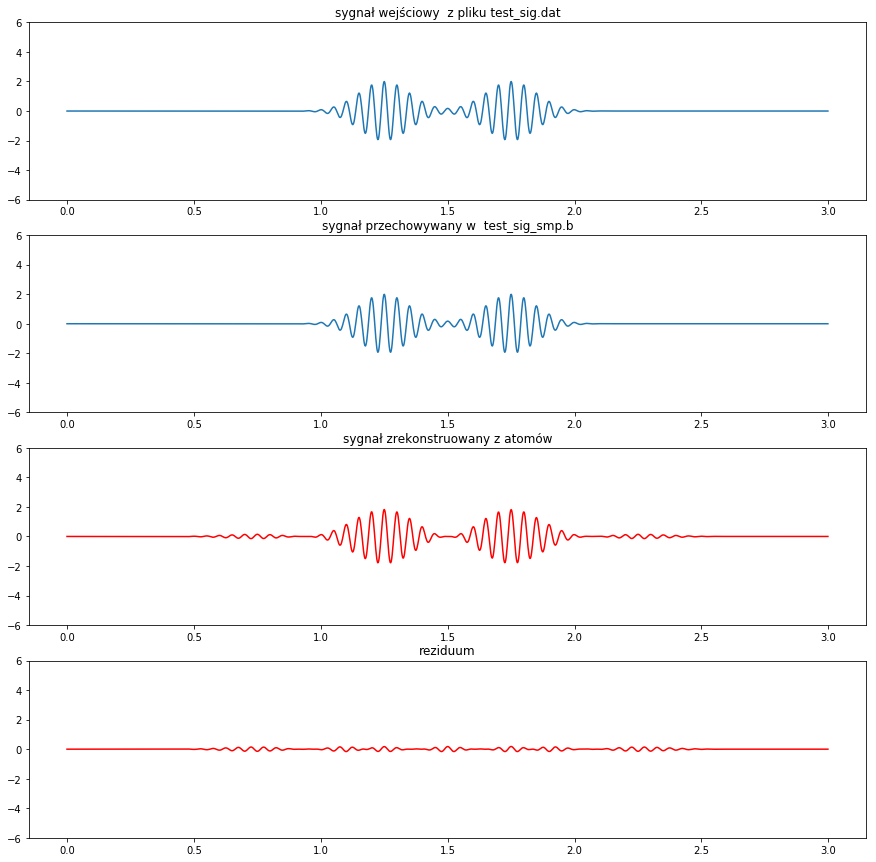

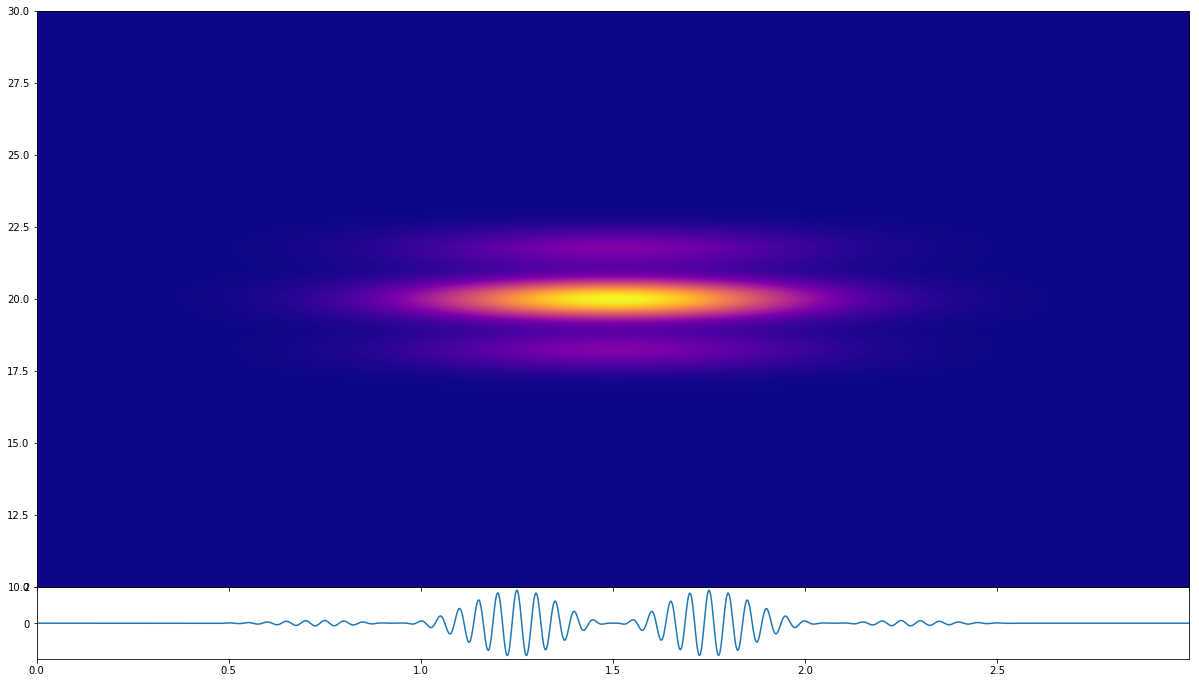

In [144]:
bookName = f'{name}.b'
book = BookImporter(bookName)
Eatoms = 0 # będziemy dla kontroli liczyć energię atomów, na początek zerujemy licznik

rekonstrukcja = np.zeros(book.epoch_s) # Przygotowujemy tablicę, w której powstanie rekonstrukcja.
t = np.arange(0,book.epoch_s/book.fs,1/book.fs) # Przygotowujemy wektor czasu. 

numerEpoki = 1                                                # Posłuży on nam do odtwarzania poszczególnych atomów
for atom in book.atoms[numerEpoki]:     # iterujemy się po atomach danej epoki
    f_Hz  = atom['params']['f']*book.fs/2    # przekodowujemy częstość atomu na częstość w Hz
    A     = atom['params']['amplitude']      # odczytujemy amplitudę
    faza  = atom['params']['phase']          # odczytujemy fazę
    t0    = atom['params']['t']/book.fs       # przeliczamy pozycję atomu z wartości w próbkach na wartości w sek.
    skala = atom['params']['scale']/book.fs   # szerokość atomu w czasie (w sek.)
    rekonstrukcja += A * np.exp(-np.pi*((t-t0)/skala)**2)*np.cos(2*np.pi*f_Hz*(t-t0)+faza) # obliczamy przebieg czasowy atomu (funkcja Gabora) i 
                                                                                            # dodajemy do rekonstrukcji
    Eatoms += atom['params']['modulus']**2 # kwadrat parametru modulus to energia niesiona przez dany atom
    
Esignal = sum(book.signals[1][0]**2) 
print('Energia sygnału: ', np.round(Esignal,1))
print('Energia atomów: ', np.round(Eatoms,1))
print('procent wyjaśnionej energii: ', np.round(Eatoms/Esignal*100,1), '%')


    
py.subplot(411)
py.plot(t,gabor_suma)
py.ylim((-6,6))
py.title('sygnał wejściowy  z pliku test_sig.dat')
py.subplot(412)
py.plot(t,book.signals[1][0])
py.ylim((-6,6))
py.title('sygnał przechowywany w  test_sig_smp.b')
# te powyższe sygnały powinny być takie same
py.subplot(413)
py.plot(t,rekonstrukcja,'r')
py.ylim((-6,6))
py.title('sygnał zrekonstruowany z atomów')
py.subplot(414)
py.plot(t,gabor_suma - rekonstrukcja,'r')
py.ylim((-6,6))
py.title('reziduum')
py.show()
py.figure(figsize=(20,10))

N = int(book.fs)
Eatoms = 0
f = np.linspace(0, Fs / 2, N)
rec_t = np.zeros((1,book.epoch_s))
rec_f = np.zeros((int(book.fs),1))

mapaEnergii = np.zeros(( int(book.fs), book.epoch_s)) # Przygotowujemy tablicę, w której powstanie reprezentacja czas-częstość.
rekonstrukcja = np.zeros(book.epoch_s) # Przygotowujemy tablicę, w której powstanie rekonstrukcja.
t = np.arange(0,book.epoch_s/book.fs,1/book.fs) # Przygotowujemy wektor czasu. 
                                                # Posłuży on nam do odtwarzania poszczególnych atomów
numerEpoki = 1                                                
for atom in book.atoms[numerEpoki]:     # iterujemy się po atomach danej epoki
    f_Hz  = atom['params']['f']*book.fs/2     # przekodowujemy częstość atomu na częstość w Hz
    A     = atom['params']['amplitude']       # odczytujemy amplitudę
    faza  = atom['params']['phase']           # odczytujemy fazę
    t0    = atom['params']['t']/book.fs       # przeliczamy pozycję atomu z wartości w próbkach na wartości w sek.
    skala = atom['params']['scale']/book.fs   # szerokość atomu w czasie (w sek.)
   
    rec_t[0,:] = np.exp(-np.pi*((t-t0)/skala)**2)     # obliczamy obwiednię czasową -> dla f. Gabora jest to f. Gaussa
    rec_f[:,0] = np.exp(-np.pi*((f-f_Hz)*skala)**2)   # obliczamy obwiednię częstotliwościową -> dla f. Gabora jest to f. Gaussa
    tfr_atom = np.kron(rec_t,rec_f) # przemnażamy przez siebie obwiednie -> to jest reprezentacja czas-częstość pojedynczego atomu
    tfr_atom/= np.sum(np.sum(tfr_atom))  # normalizujemy
    tfr_atom *= atom['params']['modulus']**2 # skalujemy energię
    mapaEnergii += tfr_atom # dajemy ją do mapy 
    rekonstrukcja += A * np.exp(-np.pi*((t-t0)/skala)**2)*np.cos(2*np.pi*f_Hz*(t-t0)+faza) # obliczamy przebieg czasowy atomu (funkcja Gabora) i 

TFRPlot(mapaEnergii, t, f, rekonstrukcja, Fs=book.fs,title ='', limits=(10,30)) 

(10, 30)

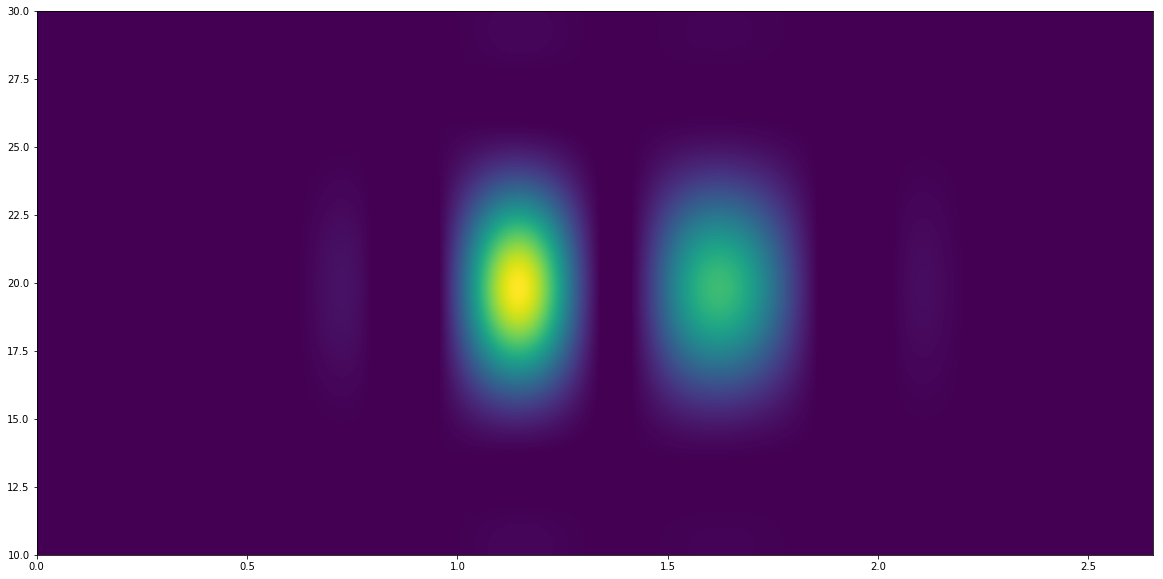

In [151]:
py.figure(figsize=(20,10))
s = gabor_suma
h = hamming(128)
NFFT =len(h)
P,f,t,im1 = specgram(s,NFFT = len(h),Fs = Fs,window = h, noverlap = 31,sides = 'twosided') 
imshow(P,aspect='auto',origin='lower',extent=(t[0]-(NFFT/2)/Fs,t[-1]-(NFFT/2)/Fs,f[0],f[-1]),interpolation='lanczos')
py.ylim(10,30)